# EDA
Exploratory Data Analysis is typically undergone before developing machine learning algorithms. Its important to understand the data before using it in machine learning algorithms, which often make assumptions about the data.

**This notebook achieves the following:**
* Autocorrelation of time-lags (kevin)
* determine stationarity
    * Dickey-fuller test (kevin)
    * Time series decomposition into: trend, seasonal, residual, using the appropiate model (additive or multiplicative) (kevin)
    * heteroskedasticity
* Cointegration between exogenous variables and target (natalie)
* Cross correlation between target and exogenous variables (Muhammed)
* constant time series (kevin)
* ACF/PACF (Natalie)
* ANOVA (Muhammed) + Tukey’s HSD test to check which specific groups differ within those variables (Muhammed)

## Imports:

In [17]:
import pandas as pd
from pathlib import Path
import re

## Data

In [18]:
cwd=Path.cwd()
data= pd.read_csv(cwd.parent / 'Data' /'Train'/'train1990s.csv',parse_dates=[0],date_format='%m%Y',index_col=0)
display(data)

fred_PCEPI  fred_AAAFFM  fred_AAAFFM_PC1  fred_AHETPI  \
observation_date                                                          
01/1990               58.553         0.76         52.00000        10.02   
02/1990               58.811         0.98        250.00000        10.07   
03/1990               59.033         1.09      -2280.00000        10.11   
04/1990               59.157         1.20      -2500.00000        10.12   
05/1990               59.290         1.29       -637.50000        10.16   
...                      ...          ...              ...          ...   
08/2020              104.887         2.16        151.16279        24.80   
09/2020              105.046         2.22        126.53061        24.82   
10/2020              105.106         2.26         91.52542        24.84   
11/2020              105.225         2.21         46.35762        24.95   
12/2020              105.690         2.17         48.63014        25.17   

                  fred_AHETPI_LOG  fred_APU000072610_PCA  fred_APU000074714  \
observation_date                                                              
01/1990                   2.30458                0.00000              1.042   
02/1990                   2.30956                0.00000              1.037   
03/1990                   2.31353                0.00000              1.023   
04/1990                   2.31451               15.86333              1.044   
05/1990                   2.31846                0.00000              1.061   
...                           ...                    ...                ...   
08/2020                   3.21084                0.00000              2.177   
09/2020                   3.21165                0.00000              2.193   
10/2020                   3.21246              -16.17792              2.159   
11/2020                   3.21687                9.26012              2.090   
12/2020                   3.22565                0.00000              2.168   

                  fred_APU000074714_CCA  fred_APU000074714_CCH  \
observation_date                                                 
01/1990                        73.61358                6.13447   
02/1990                        -5.77202               -0.48100   
03/1990                       -16.31093               -1.35924   
04/1990                        24.38400                2.03200   
05/1990                        19.38284                1.61524   
...                                 ...                    ...   
08/2020                         0.55134                0.04595   
09/2020                         8.78722                0.73227   
10/2020                       -18.75038               -1.56253   
11/2020                       -38.97730               -3.24811   
12/2020                        43.96922                3.66410   

                  fred_APU000074714_CH1  ...  \
observation_date                         ...   
01/1990                           0.124  ...   
02/1990                           0.111  ...   
03/1990                           0.083  ...   
04/1990                          -0.021  ...   
05/1990                          -0.058  ...   
...                                 ...  ...   
08/2020                          -0.478  ...   
09/2020                          -0.437  ...   
10/2020                          -0.514  ...   
11/2020                          -0.530  ...   
12/2020                          -0.419  ...   

                  CMO-Historical-Data-Monthly_Food  \
observation_date                                     
01/1990                                  56.551650   
02/1990                                  56.076261   
03/1990                                  55.868281   
04/1990                                  56.391158   
05/1990                                  56.064222   
...                                            ...   
08/2020                                  91.167608   
09/2020                                  95.

## Get untransformed variables:

fred has applied transformations to the orginal data (such as using a log transformation to remove heterskedascisity) however we need to analyze the original data. To do this we need to remove the transformed variables (contains fred_\<name of varibale\>_\<name of transform\>) and consider the untransformed data first.

In [19]:
transformedCols=[]
for i in data.columns:
    match=re.findall(r'fred_.*_.*',i)
    if match!=[]:
        transformedCols.append(match[0])

unmodifiedDf= data.drop(transformedCols,axis=1)
display(unmodifiedDf)

fred_PCEPI  fred_AAAFFM  fred_AHETPI  fred_APU000074714  \
observation_date                                                            
01/1990               58.553         0.76        10.02              1.042   
02/1990               58.811         0.98        10.07              1.037   
03/1990               59.033         1.09        10.11              1.023   
04/1990               59.157         1.20        10.12              1.044   
05/1990               59.290         1.29        10.16              1.061   
...                      ...          ...          ...                ...   
08/2020              104.887         2.16        24.80              2.177   
09/2020              105.046         2.22        24.82              2.193   
10/2020              105.106         2.26        24.84              2.159   
11/2020              105.225         2.21        24.95              2.090   
12/2020              105.690         2.17        25.17              2.168   

                  fred_BAA10YM  fred_BAAFFM  fred_CSUSHPISA  fred_EXCAUS  \
observation_date                                                           
01/1990                   1.73         1.71          76.897       1.1720   
02/1990                   1.67         1.90          77.053       1.1965   
03/1990                   1.62         1.93          77.201       1.1800   
04/1990                   1.51         2.04          77.278       1.1641   
05/1990                   1.65         2.23          77.297       1.1747   
...                        ...          ...             ...          ...   
08/2020                   2.62         3.18         222.278       1.3229   
09/2020                   2.68         3.27         225.730       1.3230   
10/2020                   2.65         3.35         229.665       1.3218   
11/2020                   2.43         3.21         233.239       1.3073   
12/2020                   2.23         3.07         236.547       1.2809   

                  fred_EXDNUS  fred_EXINUS  ...  \
observation_date                            ...   
01/1990                6.5620      16.9633  ...   
02/1990                6.4729      16.9895  ...   
03/1990                6.5349      17.1164  ...   
04/1990                6.4305      17.2943  ...   
05/1990                6.3349      17.3245  ...   
...                       ...          ...  ...   
08/2020                6.2938      74.5657  ...   
09/2020                6.3149      73.5233  ...   
10/2020                6.3243      73.5648  ...   
11/2020                6.2968      74.2311  ...   
12/2020                6.1154      73.6195  ...   

                  CMO-Historical-Data-Monthly_Food  \
observation_date                                     
01/1990                                  56.551650   
02/1990                                  56.076261   
03/1990                                  55.868281   
04/1990                                  56.391158   
05/1990                                  56.064222   
...                                            ...   
08/2020                                  91.167608   
09/2020                                  95.157486   
10/2020                                  98.804392   
11/2020                                 103.999435   
12/2020                                 107.341497   

                  CMO-Historical-Data-Monthly_Oils_and_meals  \
observation_date                                               
01/1990                                            45.351208   
02/1990                                            44.285143   
03/1990                                            44.290949   
04/1990                                            43.846209   
05/1990                                            45.067305   
...                                                      ...   
08/2020                                            88.237199   
09/2020                                            94.406776   
10/2020             

# Summary of the ANOVA + Tukey's HSD Analysis Process

## 1. ANOVA Test
- **Performed ANOVA** (Analysis of Variance) between `fred_PCEPI` and all other numerical variables.
- **Binned numerical variables** into three categories: **Low, Medium, and High** for categorical comparisons.
- **Identified statistically significant variables** where **p-value < 0.05**.
- **Stored results** in a structured table including the **F-statistic, p-value, and significance status**.

## 2. Post-hoc Analysis (Tukey's HSD Test)
- **Conducted Tukey’s HSD test** to identify **which specific groups differ** within the significant variables.
- **Stored results** of **pairwise comparisons between categories**.
- **Printed and saved the findings** to `"tukey_posthoc_results.csv"`.

## 3. Correlation Analysis
- **Generated a heatmap** showing the correlation between **significant variables** and `fred_PCEPI`.
- **Extracted highly correlated variables** based on a threshold (**absolute correlation > 0.5**).
- **Sorted these variables** based on **absolute correlation values**, ensuring the strongest relationships (**positive or negative**) appear at the top.
- **Printed and saved results** in `"highly_correlated_significant_variables.csv"`.

## 4. Data Visualization
-  **A histogram** of `fred_PCEPI` to understand its **distribution**.
-  **Boxplots** showing how `fred_PCEPI` varies across different **categories of significant variables**.
-  **A heatmap** displaying **correlations** between significant variables.
-  **A pairplot** to visualize relationships between **highly correlated significant variables**.



In [20]:
# Check data types to identify categorical and numerical variables
df_info = unmodifiedDf.dtypes.reset_index()
df_info.columns = ['Column', 'DataType']
df_info_grouped = df_info.groupby('DataType').count()

# Display categorical and numerical variable distribution
print("Data Types Overview:")
print(df_info)


Data Types Overview:
                                              Column DataType
0                                         fred_PCEPI  float64
1                                        fred_AAAFFM  float64
2                                        fred_AHETPI  float64
3                                  fred_APU000074714  float64
4                                       fred_BAA10YM  float64
..                                               ...      ...
133  CMO-Historical-Data-Monthly_Other_raw_materials  float64
134          CMO-Historical-Data-Monthly_Fertilizers  float64
135      CMO-Historical-Data-Monthly_Metals_minerals  float64
136          CMO-Historical-Data-Monthly_Base metals  float64
137      CMO-Historical-Data-Monthly_Precious_metals  float64

[138 rows x 2 columns]


In [21]:
import numpy as np
from scipy import stats

# Select a numerical variable to categorize (for example: 'fred_AAAFFM')
num_var = 'fred_AAAFFM'

# Create bins for the numerical variable (e.g., Low, Medium, High)
unmodifiedDf['category'] = pd.qcut(unmodifiedDf[num_var], q=3, labels=['Low', 'Medium', 'High'])

# Drop NaN values for valid ANOVA comparison
df_clean = unmodifiedDf.dropna(subset=['category', 'fred_PCEPI'])

# Group data by the categorical variable
groups = [df_clean[df_clean['category'] == category]['fred_PCEPI'] for category in df_clean['category'].unique()]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

# Display results
print("ANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The differences between the groups are statistically significant.")
else:
    print("No significant differences found between the groups.")


ANOVA Test Results:
F-statistic: 7.2828
P-value: 0.0008
The differences between the groups are statistically significant.


In [22]:
# Initialize a dictionary to store ANOVA results
anova_results = []

# Set significance level
alpha = 0.05

# Select numerical variables (excluding target 'fred_PCEPI')
numerical_vars = unmodifiedDf.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_vars.remove('fred_PCEPI')

# Iterate over each numerical variable
for var in numerical_vars:
    try:
        # Bin the numerical variable into three categories: Low, Medium, High
        unmodifiedDf['category'] = pd.qcut(unmodifiedDf[var], q=3, labels=['Low', 'Medium', 'High'])
        
        # Drop NaN values for valid ANOVA comparison
        df_clean = unmodifiedDf.dropna(subset=['category', 'fred_PCEPI'])

        # Group data by the categorical variable
        groups = [df_clean[df_clean['category'] == category]['fred_PCEPI'] for category in df_clean['category'].unique()]

        # Perform ANOVA test
        f_stat, p_value = stats.f_oneway(*groups)

        # Determine significance
        significance = "Significant" if p_value < alpha else "Not Significant"

        # Store results
        anova_results.append({
            'Target': 'fred_PCEPI',
            'Variable': var,
            'F-statistic': f_stat,
            'p-value': p_value,
            'Significance': significance
        })
    except Exception as e:
        # Handle any errors (e.g., if a variable has too many missing values)
        anova_results.append({
            'Target': 'fred_PCEPI',
            'Variable': var,
            'F-statistic': np.nan,
            'p-value': np.nan,
            'Significance': "Error"
        })

# Convert results to a DataFrame
anova_df = pd.DataFrame(anova_results)

# Print the first 10 rows of ANOVA results
print("ANOVA Test Results (Top 10 variables):")
print(anova_df.head(10))

ANOVA Test Results (Top 10 variables):
       Target           Variable  F-statistic        p-value Significance
0  fred_PCEPI        fred_AAAFFM     7.282789   7.905940e-04  Significant
1  fred_PCEPI        fred_AHETPI  1467.384817  2.285938e-176  Significant
2  fred_PCEPI  fred_APU000074714   398.074380   7.396060e-93  Significant
3  fred_PCEPI       fred_BAA10YM    46.050837   1.399181e-18  Significant
4  fred_PCEPI        fred_BAAFFM     7.514286   6.328369e-04  Significant
5  fred_PCEPI     fred_CSUSHPISA   545.033899  6.989399e-111  Significant
6  fred_PCEPI        fred_EXCAUS    42.279278   2.934330e-17  Significant
7  fred_PCEPI        fred_EXDNUS     4.902651   7.917783e-03  Significant
8  fred_PCEPI        fred_EXINUS   525.736486  9.828352e-109  Significant
9  fred_PCEPI        fred_EXKOUS   166.507579   2.920366e-52  Significant


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Initialize a dictionary to store post-hoc results
posthoc_results = []

# Ensure 'anova_df' is already computed and contains 'Significance' column
if 'Significance' in anova_df.columns:
    # Get the list of significant variables
    significant_vars = anova_df[anova_df['Significance'] == 'Significant']['Variable'].tolist()

    # Iterate over each numerical variable that had a significant ANOVA result
    for var in significant_vars:
        try:
            # Bin the numerical variable into three categories: Low, Medium, High
            unmodifiedDf['category'] = pd.qcut(unmodifiedDf[var], q=3, labels=['Low', 'Medium', 'High'])

            # Drop NaN values for valid comparison
            df_clean = unmodifiedDf.dropna(subset=['category', 'fred_PCEPI'])

            # Perform Tukey's HSD test
            tukey = pairwise_tukeyhsd(endog=df_clean['fred_PCEPI'], groups=df_clean['category'], alpha=0.05)

            # Store results
            for result in tukey.summary().data[1:]:
                posthoc_results.append({
                    'Variable': var,
                    'Group1': result[0],
                    'Group2': result[1],
                    'Mean Diff': result[2],
                    'p-value': result[4],
                    'Significant': 'Yes' if result[4] < 0.05 else 'No'
                })
        except Exception as e:
            posthoc_results.append({
                'Variable': var,
                'Group1': 'Error',
                'Group2': 'Error',
                'Mean Diff': np.nan,
                'p-value': np.nan,
                'Significant': 'Error'
            })

    # Convert results to a DataFrame
    posthoc_df = pd.DataFrame(posthoc_results)

    # Print the first 10 results
    print("\nTukey's HSD Post-hoc Test Results (Top 10):")
    print(posthoc_df.head(10))

    # Save the results of CSV file
    #posthoc_df.to_csv("tukey_posthoc_results.csv", index=False)
    #print("\nTukey's HSD results saved to 'tukey_posthoc_results.csv'")

else:
    print("Error: The 'Significance' column is missing in anova_df. Ensure ANOVA results were computed first.")



Tukey's HSD Post-hoc Test Results (Top 10):
            Variable Group1  Group2  Mean Diff  p-value Significant
0        fred_AAAFFM   High     Low    -2.7630  -6.7678         Yes
1        fred_AAAFFM   High  Medium     3.7240  -0.2969         Yes
2        fred_AAAFFM    Low  Medium     6.4871   2.4742          No
3        fred_AHETPI   High     Low   -31.5394 -32.9094         Yes
4        fred_AHETPI   High  Medium   -16.0770 -17.4443         Yes
5        fred_AHETPI    Low  Medium    15.4624  14.0978          No
6  fred_APU000074714   High     Low   -26.7640 -29.0663         Yes
7  fred_APU000074714   High  Medium    -7.5199  -9.8223         Yes
8  fred_APU000074714    Low  Medium    19.2440  16.9417          No
9       fred_BAA10YM   High     Low   -14.7720 -18.4245         Yes


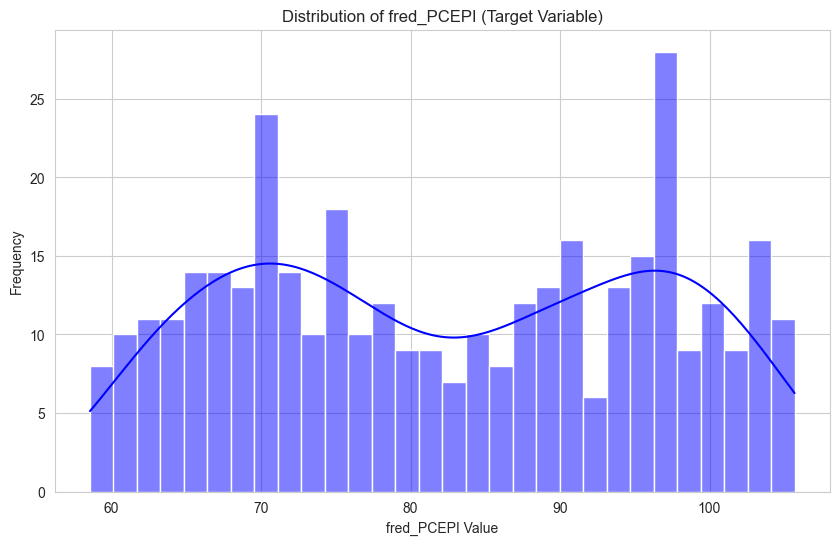

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# 1. Distribution of the Target Variable (fred_PCEPI)
plt.figure(figsize=(10, 6))
sns.histplot(unmodifiedDf['fred_PCEPI'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of fred_PCEPI (Target Variable)")
plt.xlabel("fred_PCEPI Value")
plt.ylabel("Frequency")
plt.show()


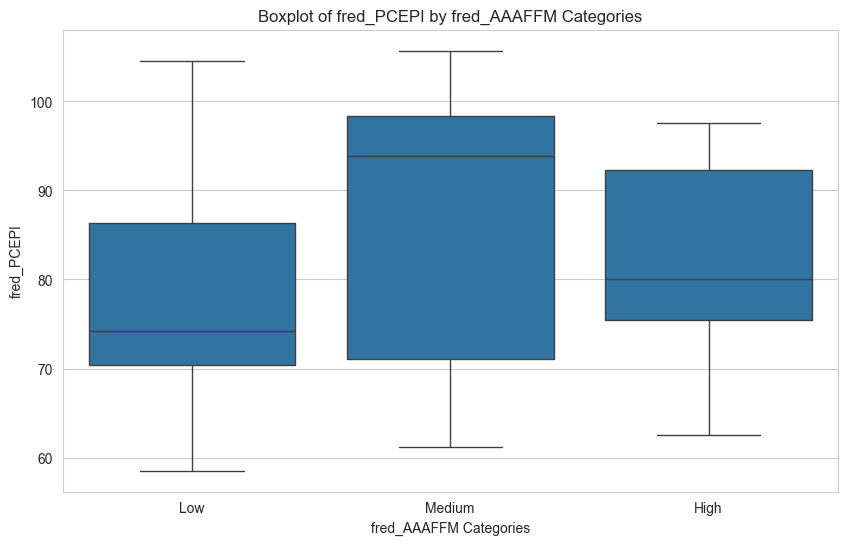

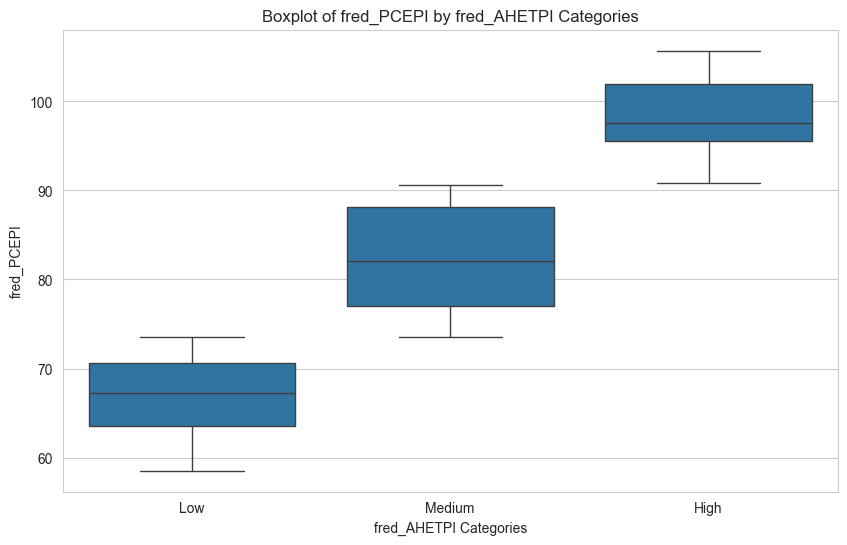

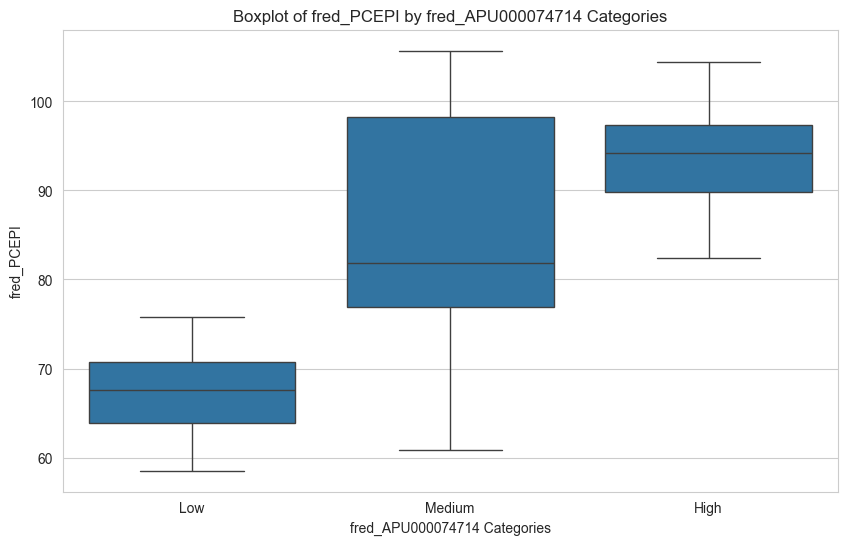

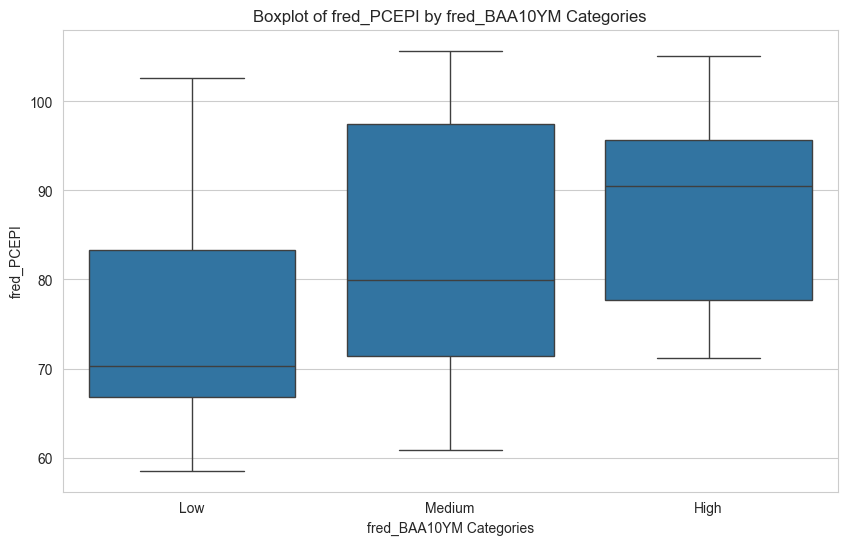

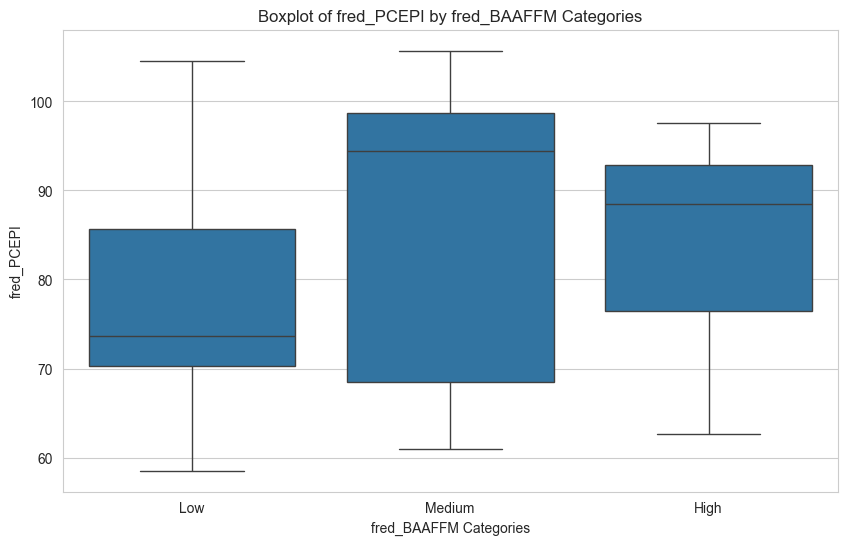

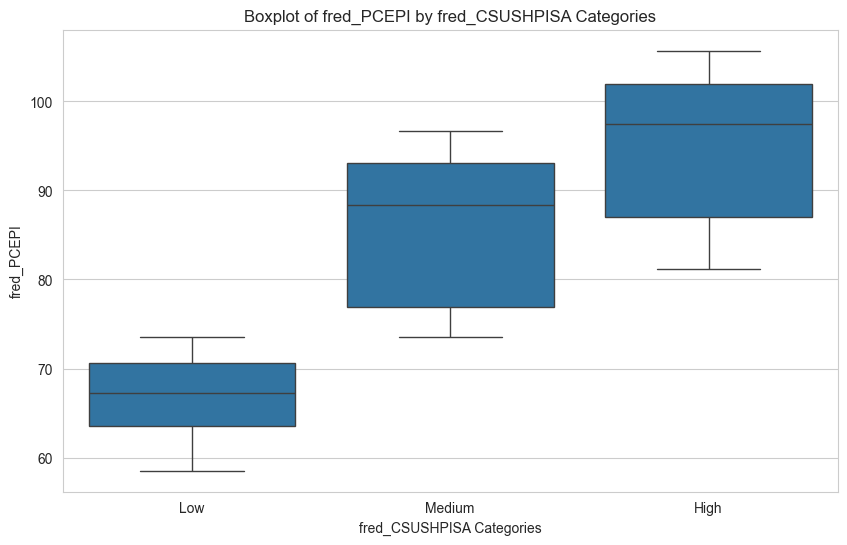

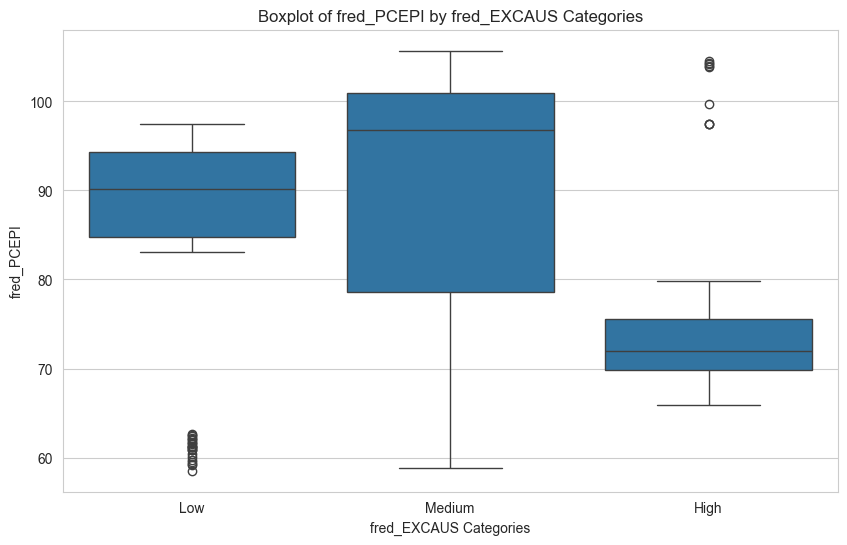

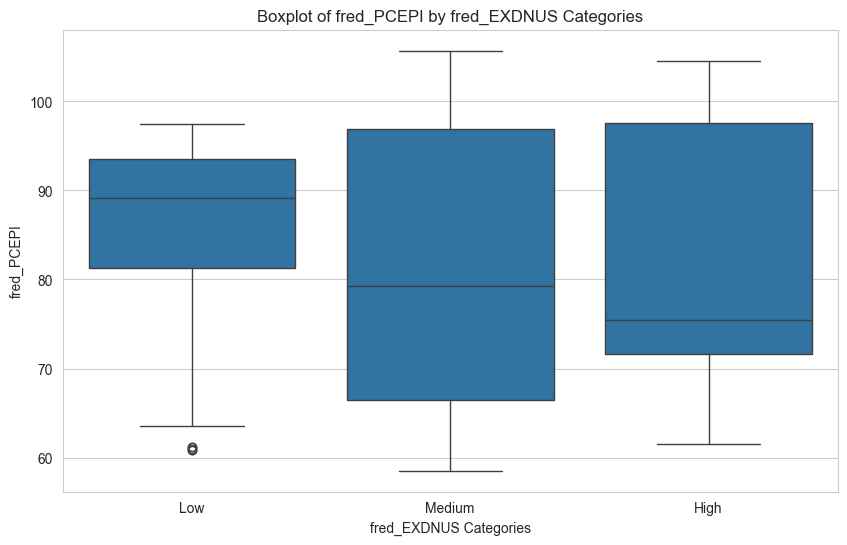

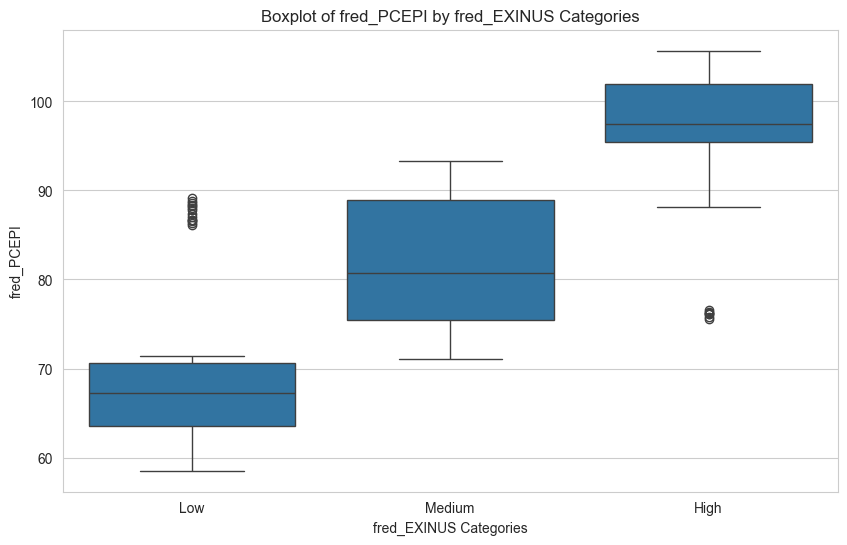

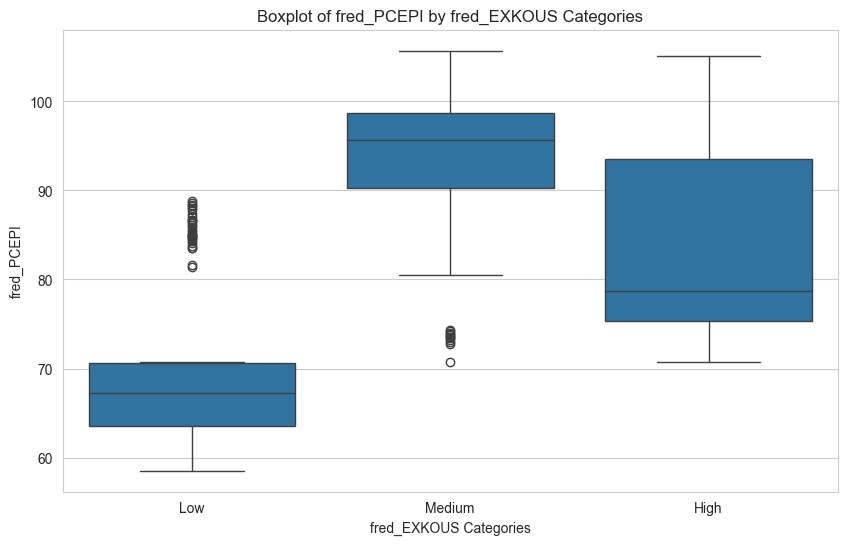

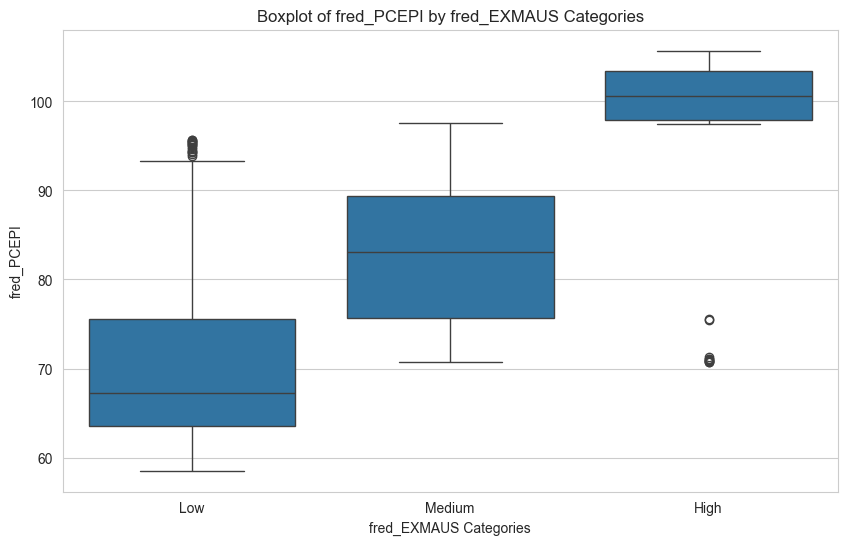

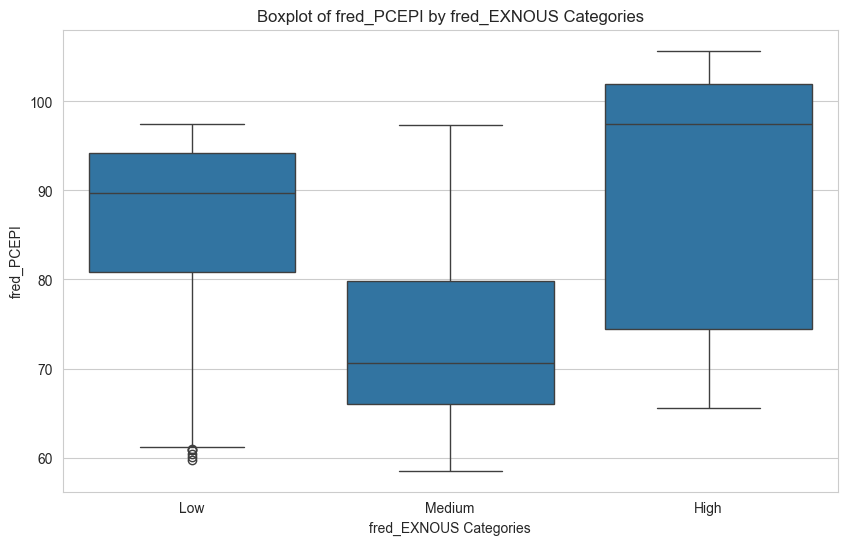

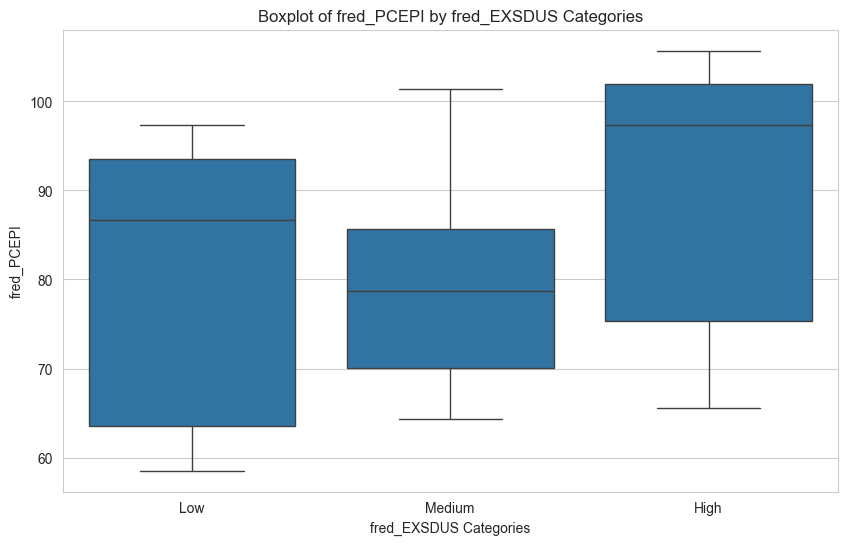

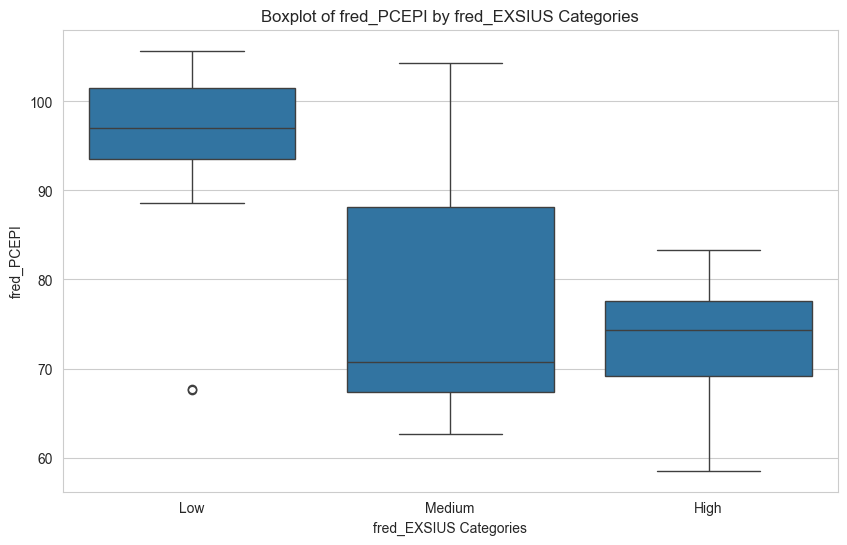

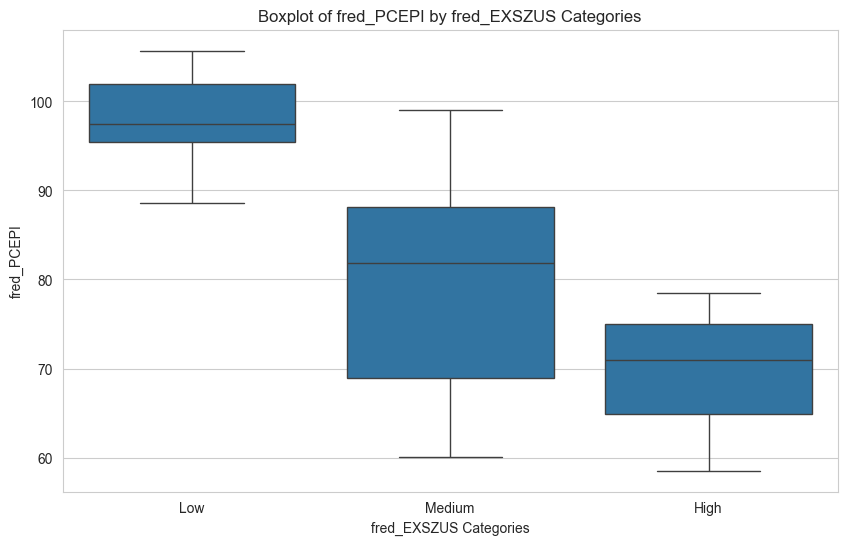

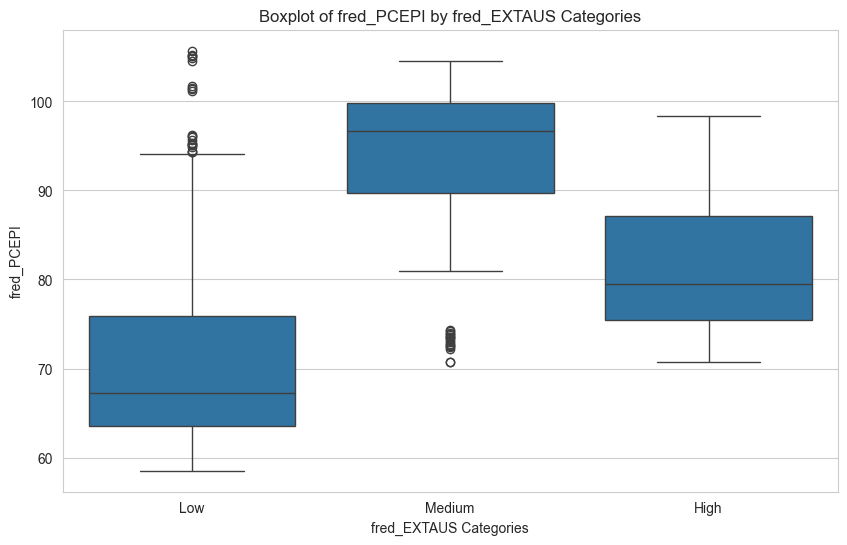

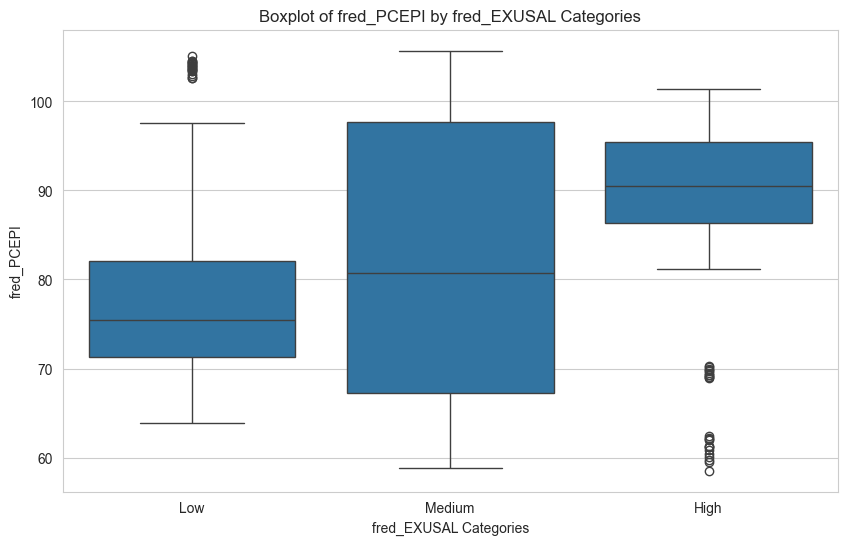

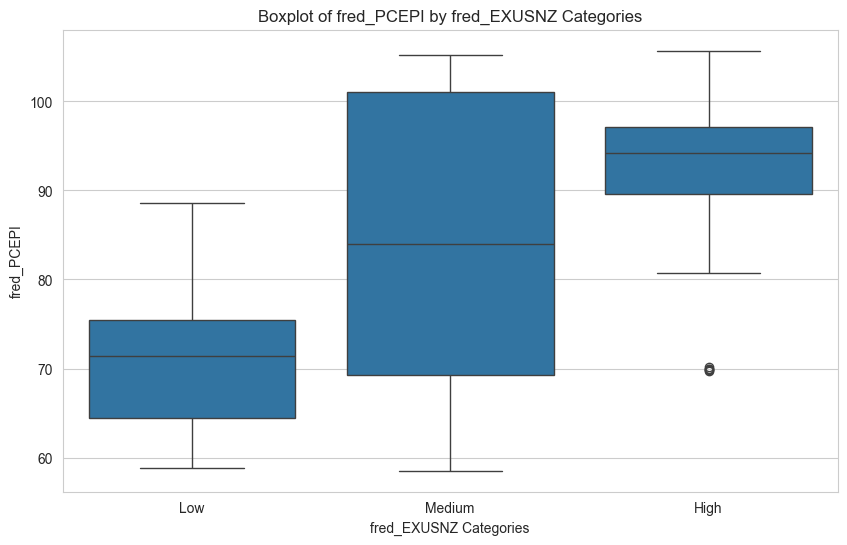

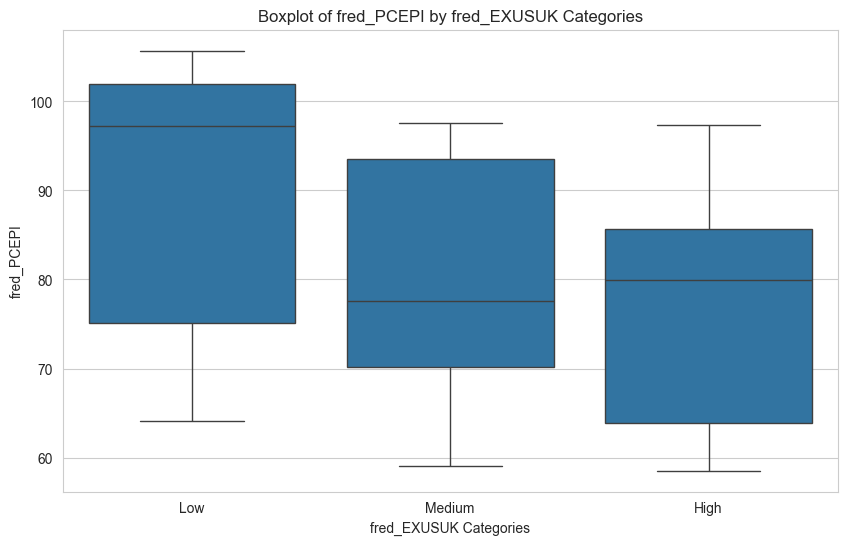

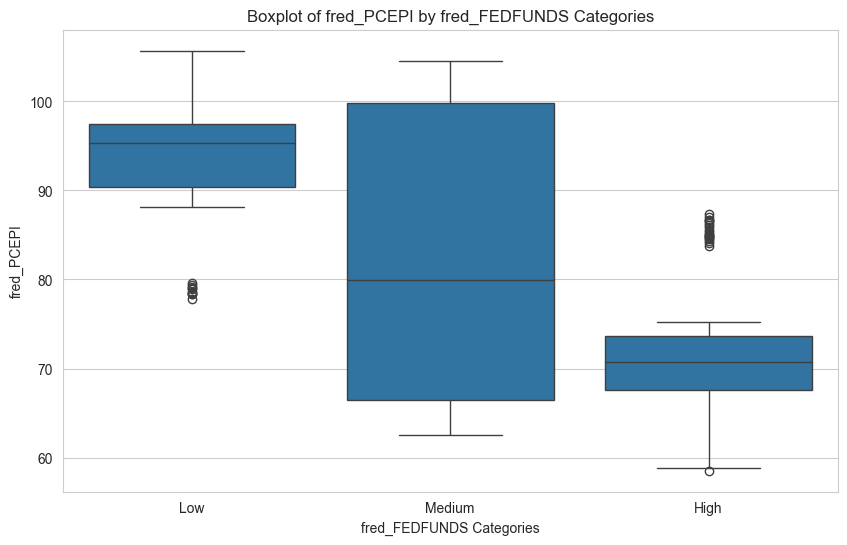

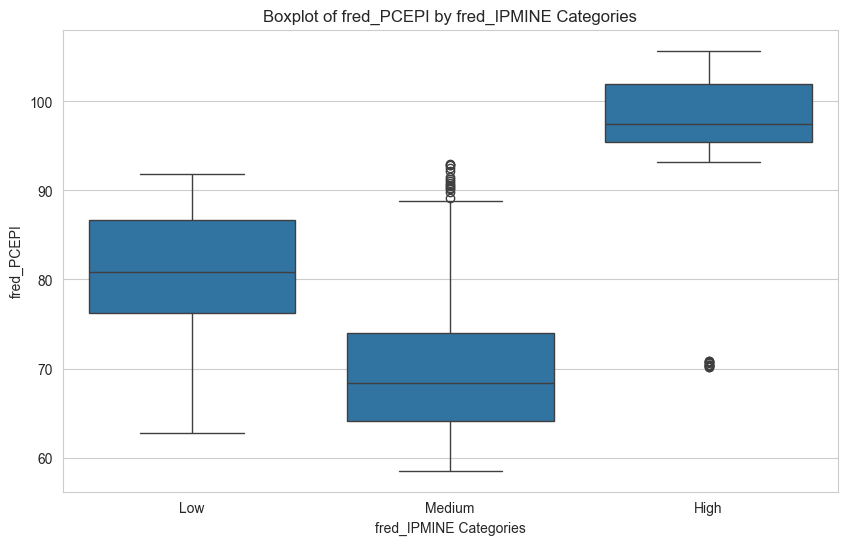

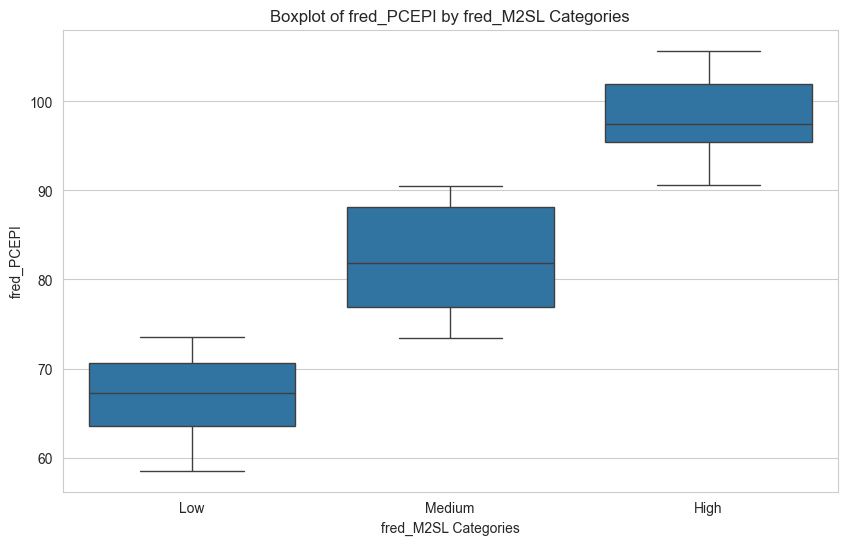

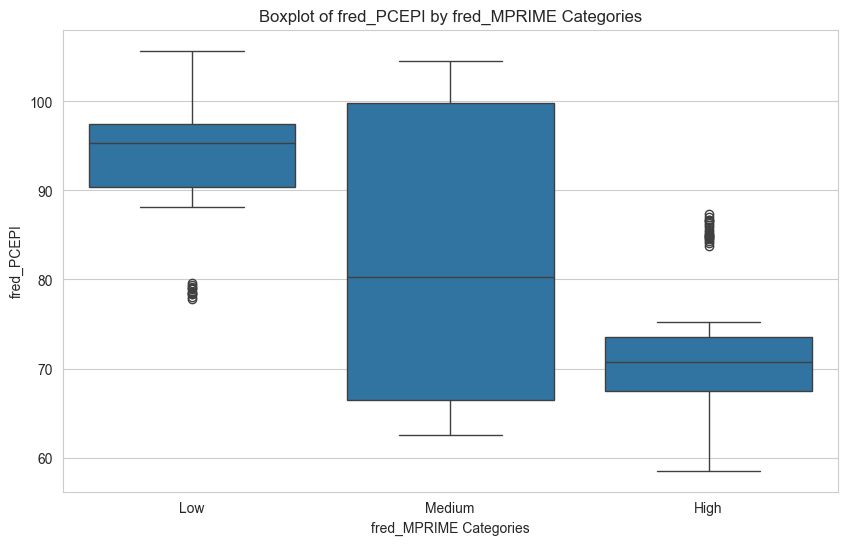

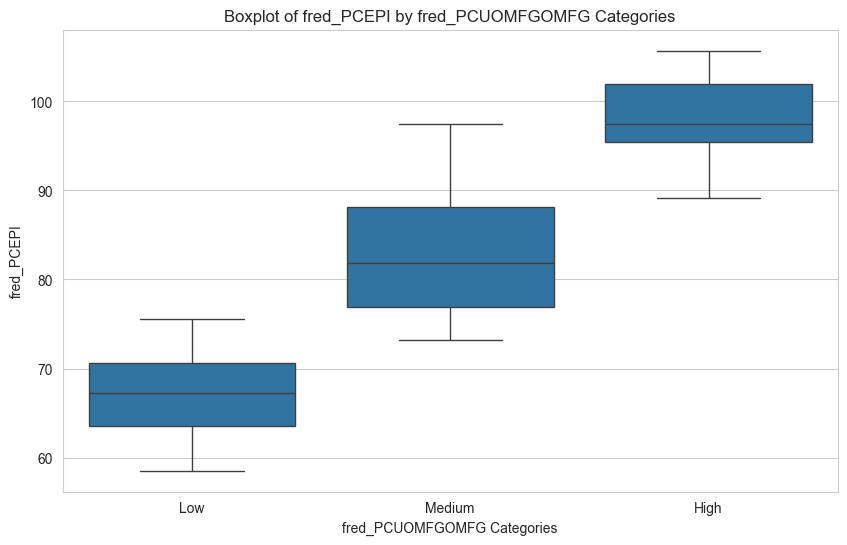

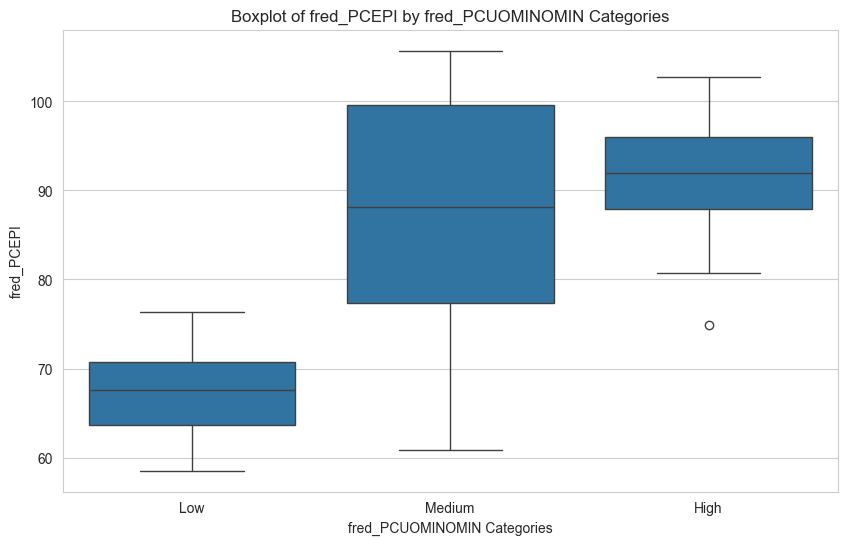

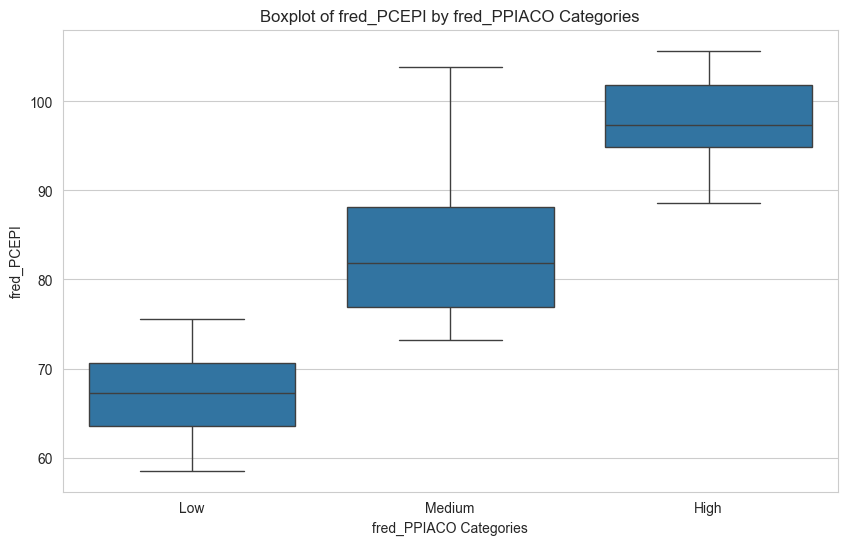

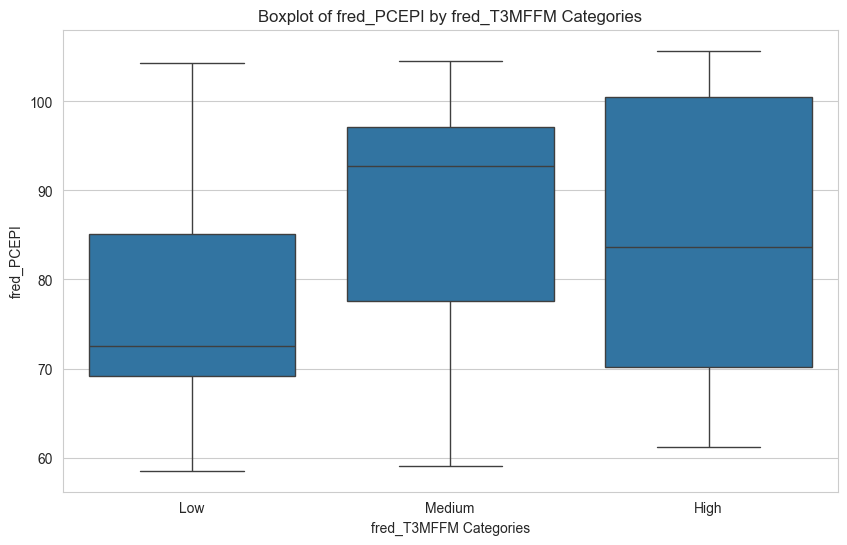

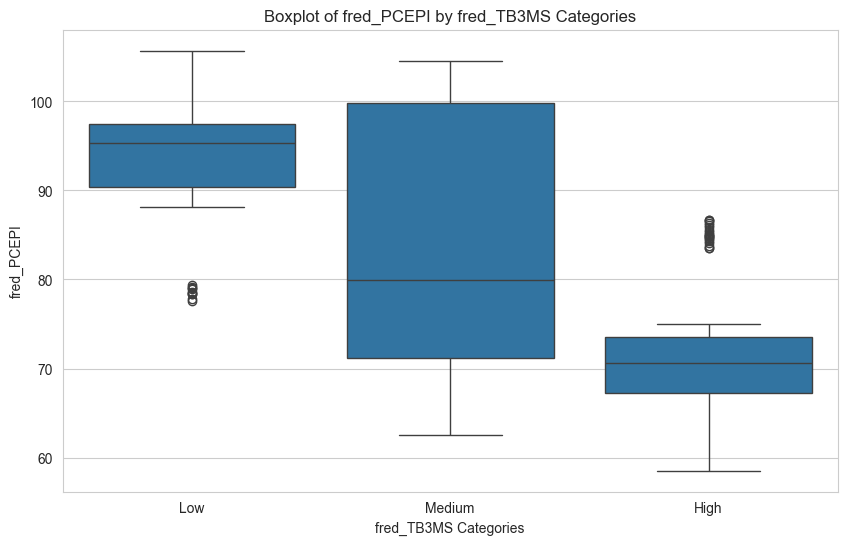

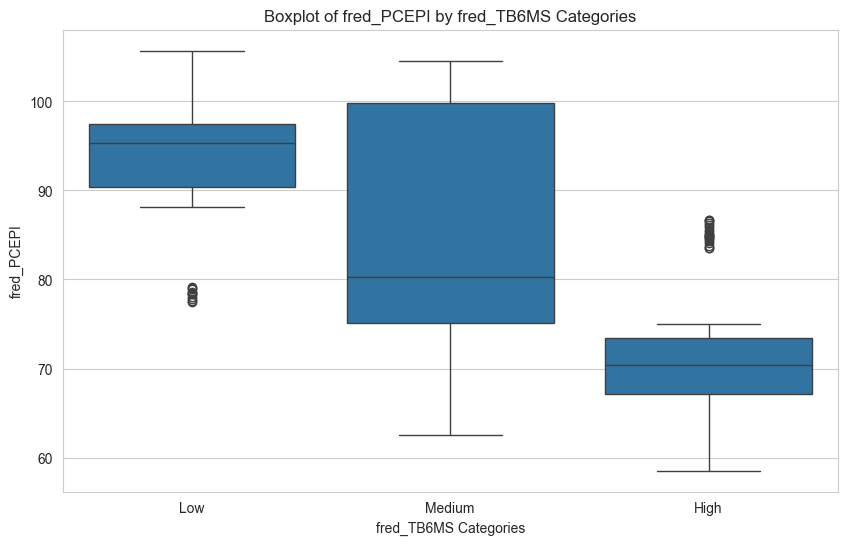

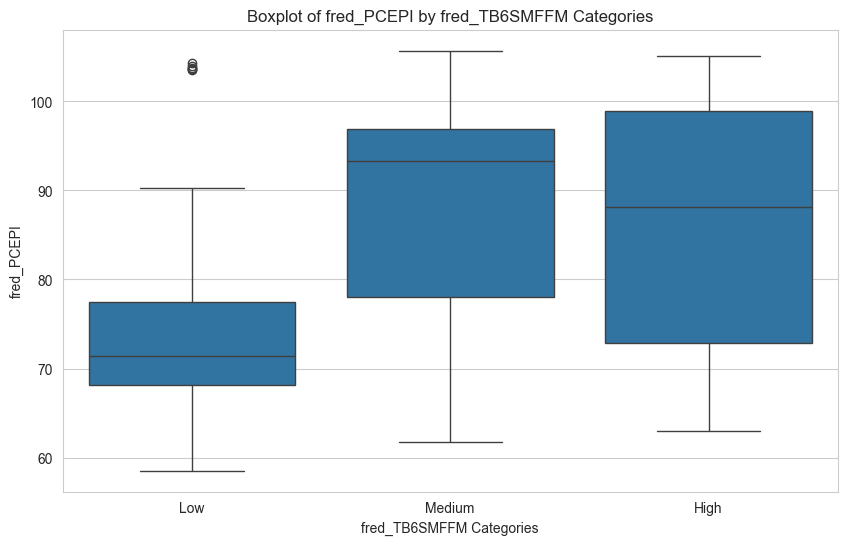

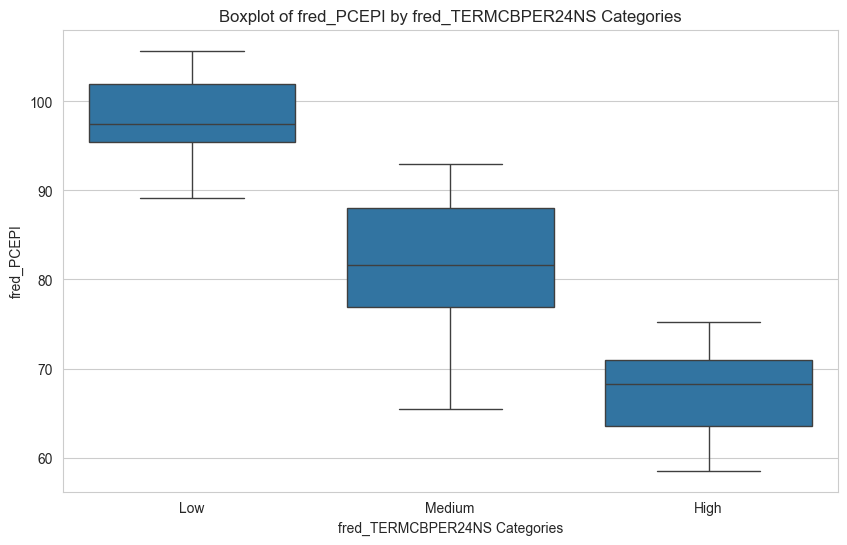

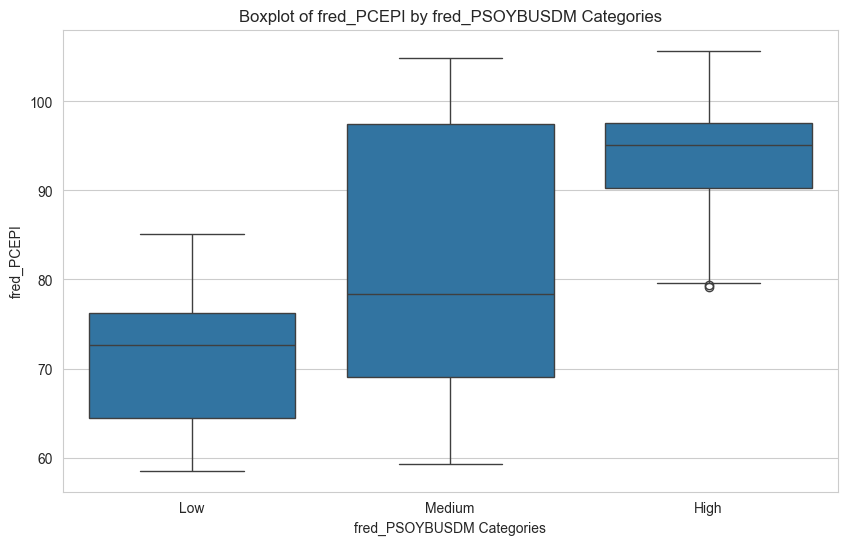

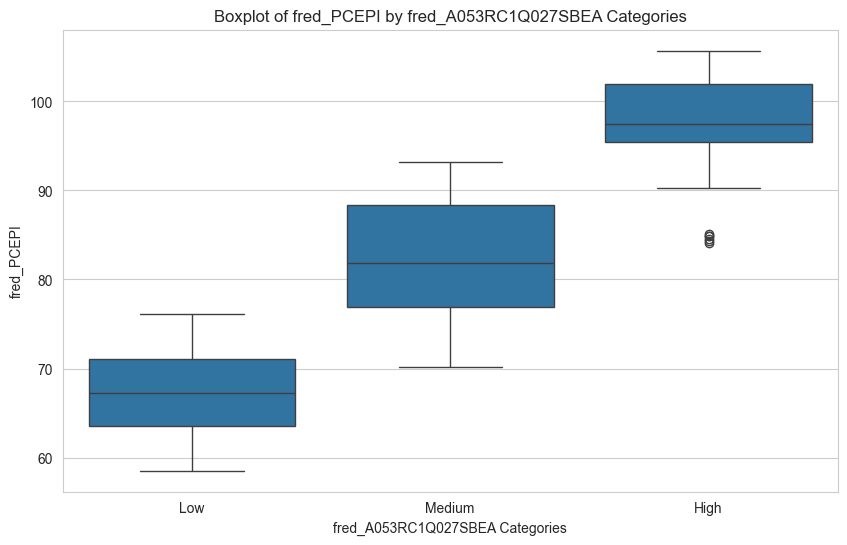

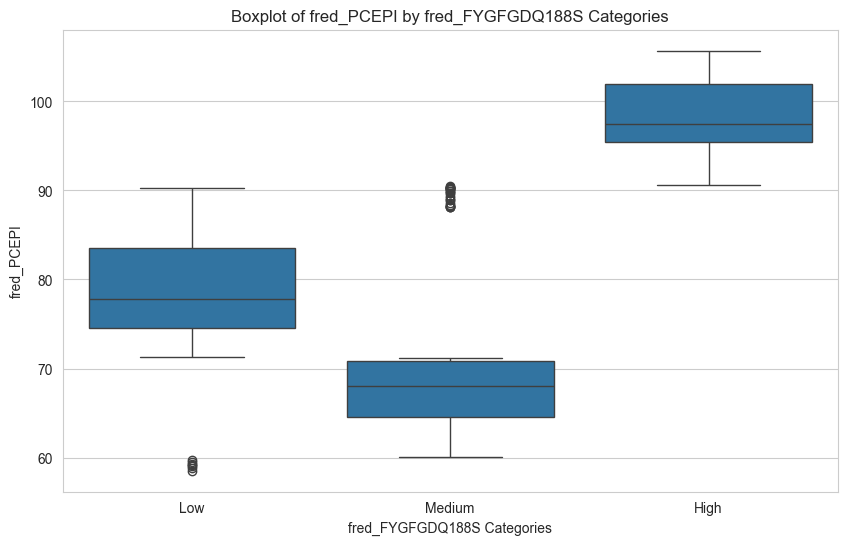

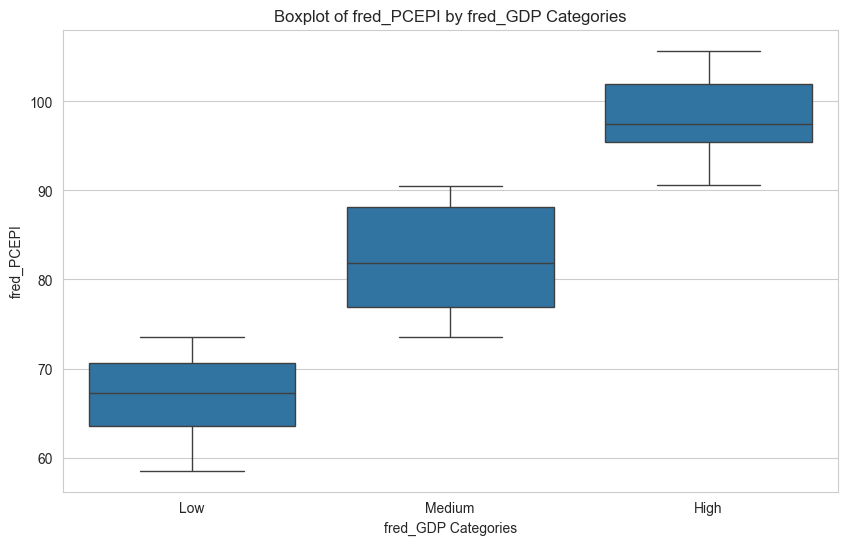

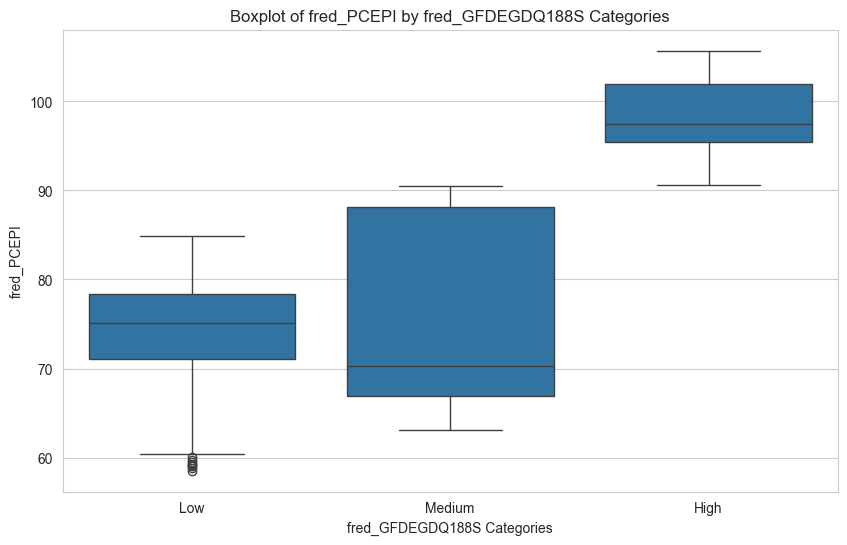

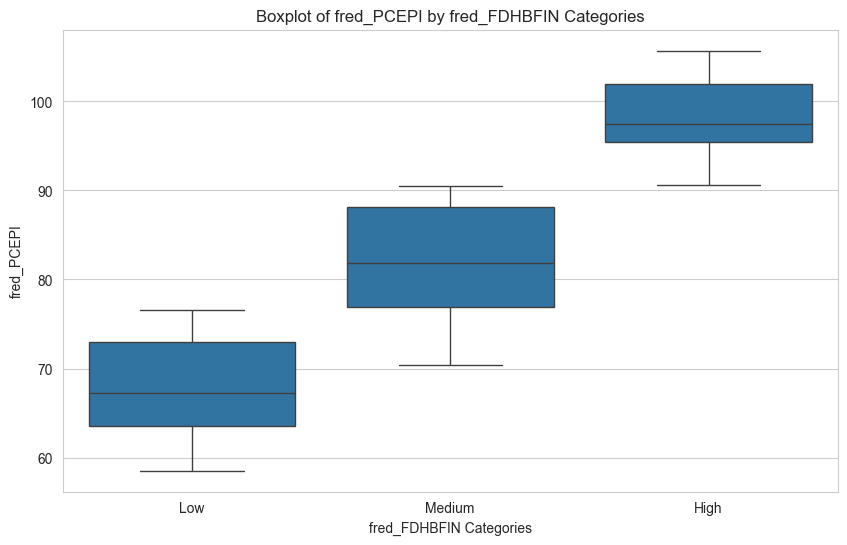

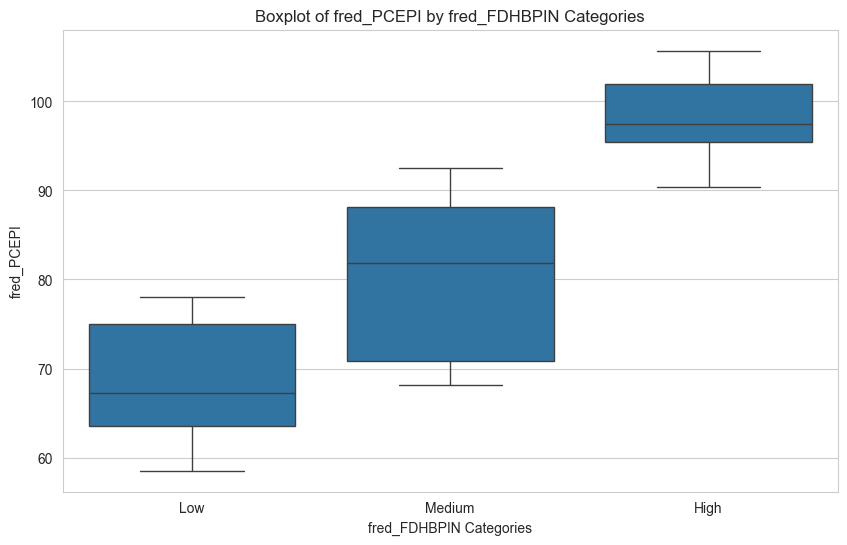

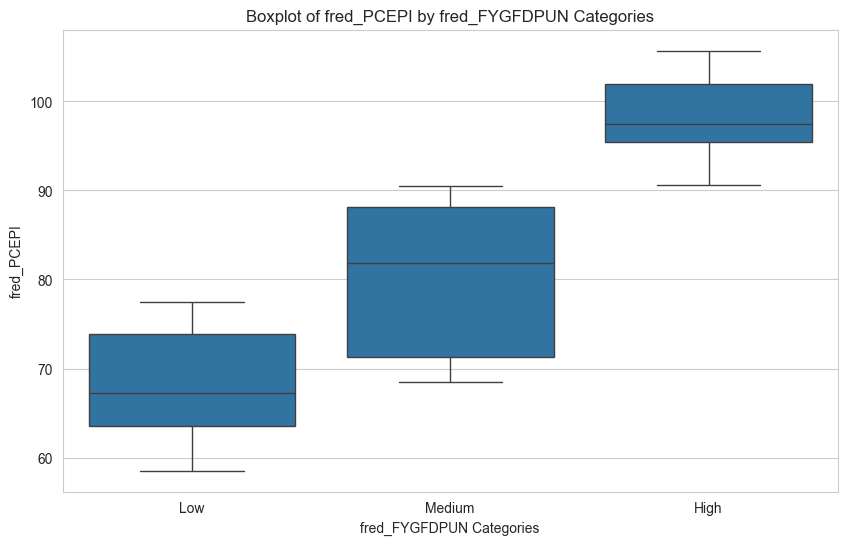

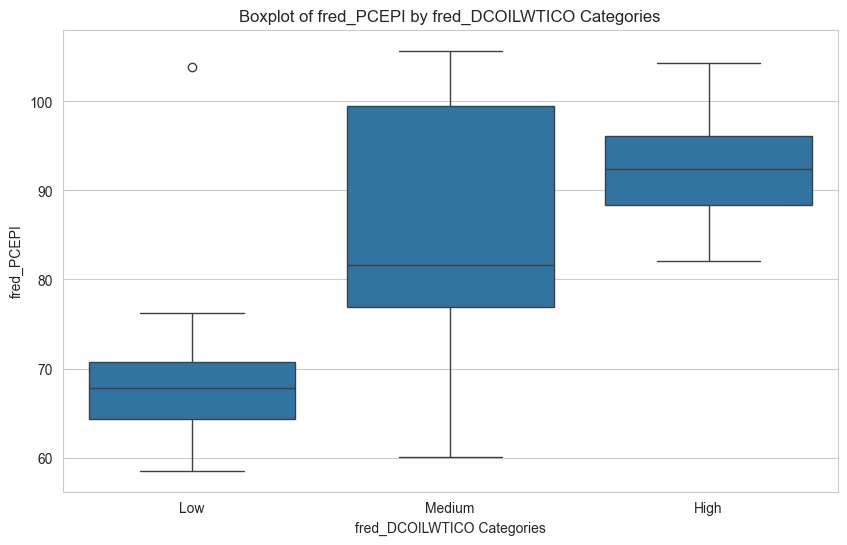

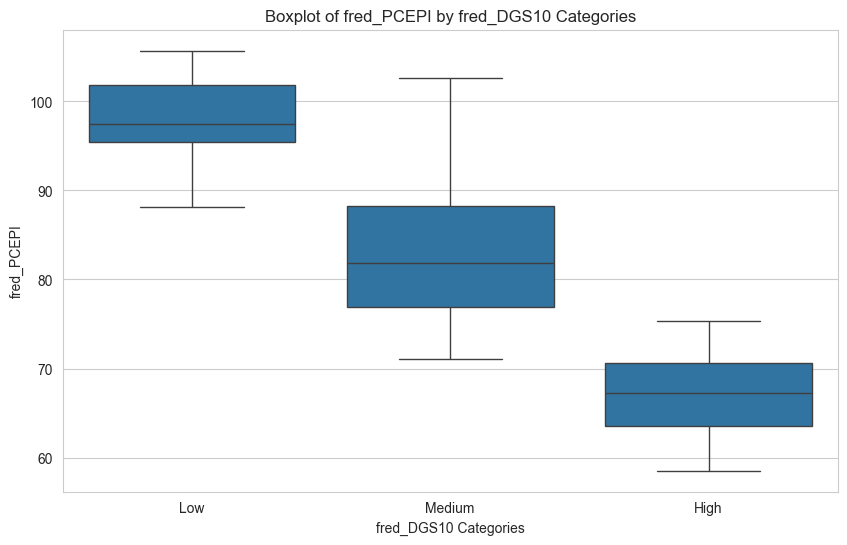

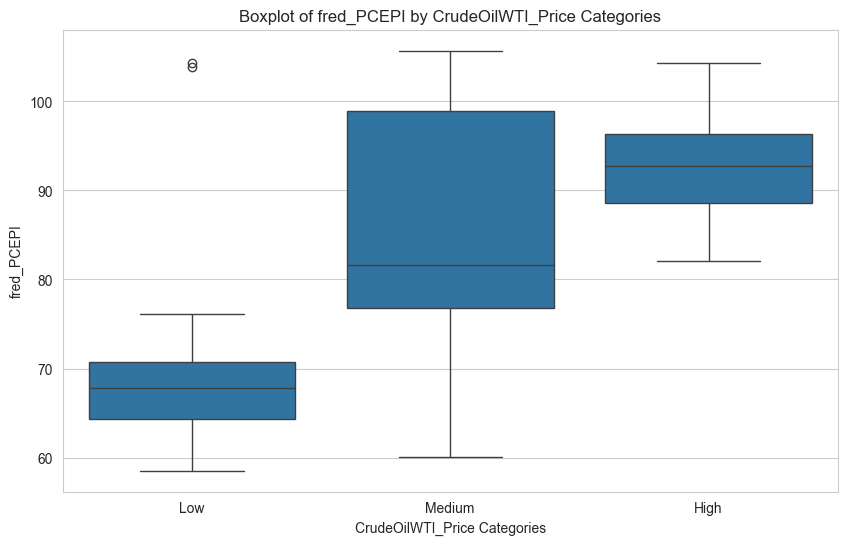

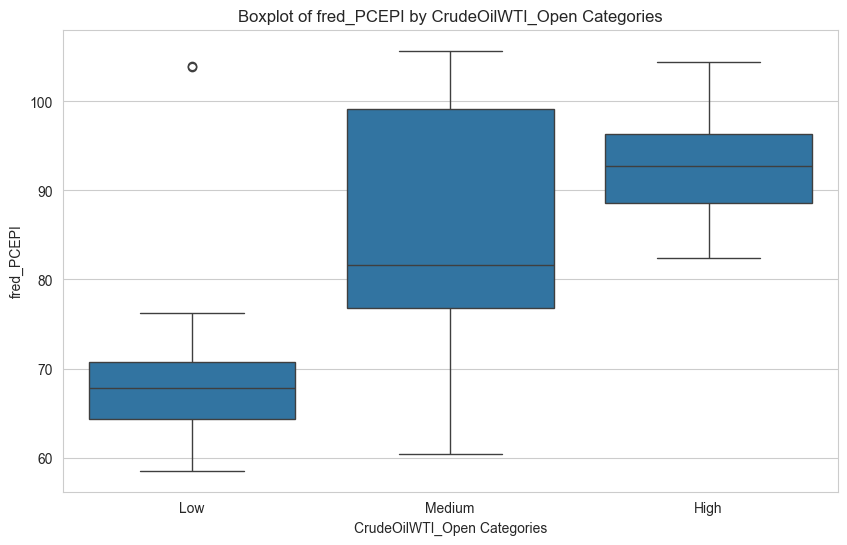

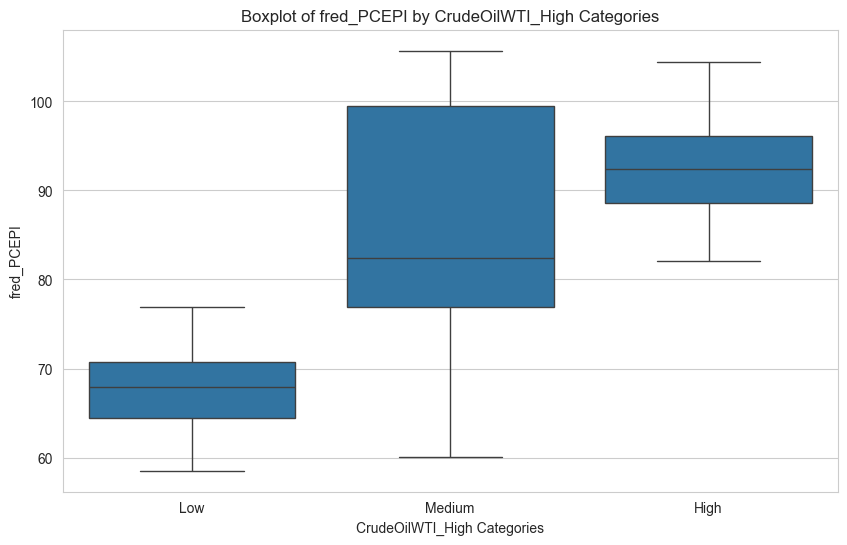

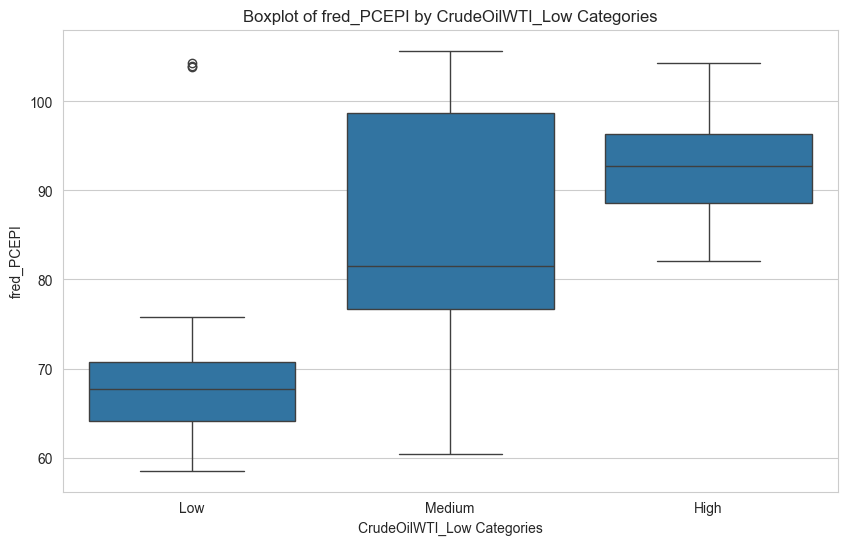

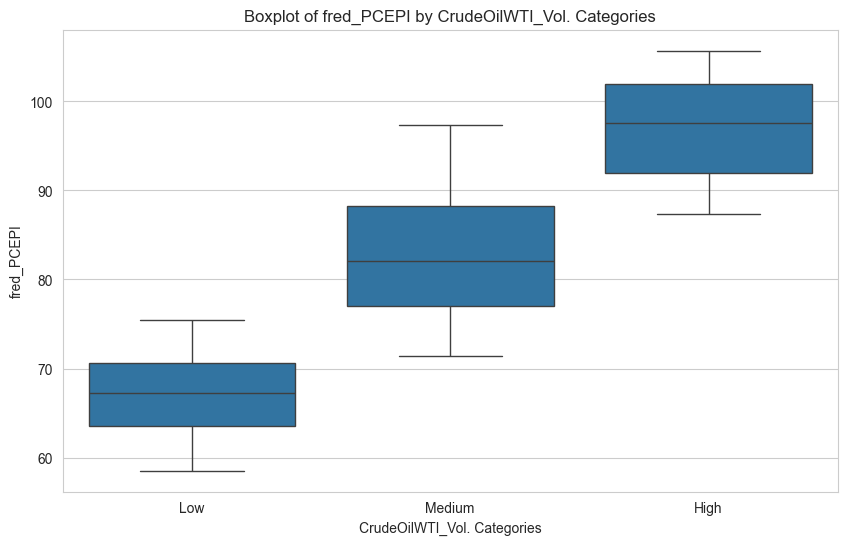

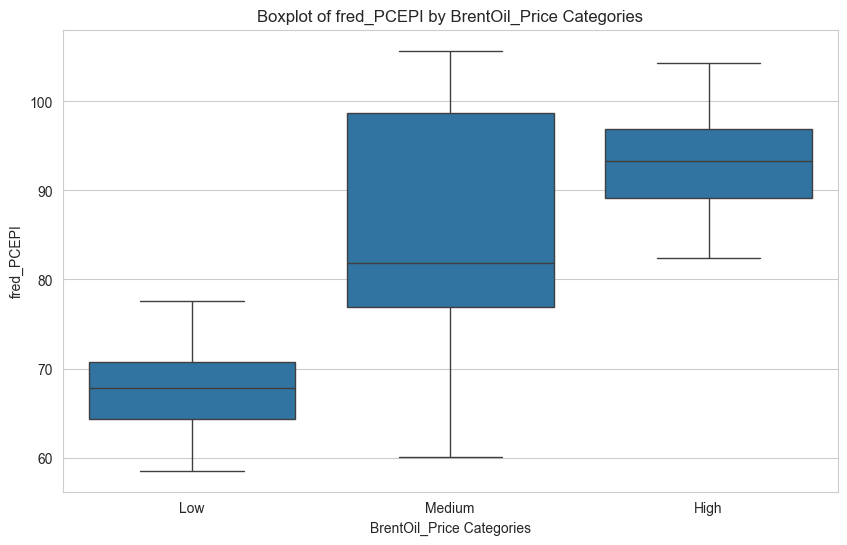

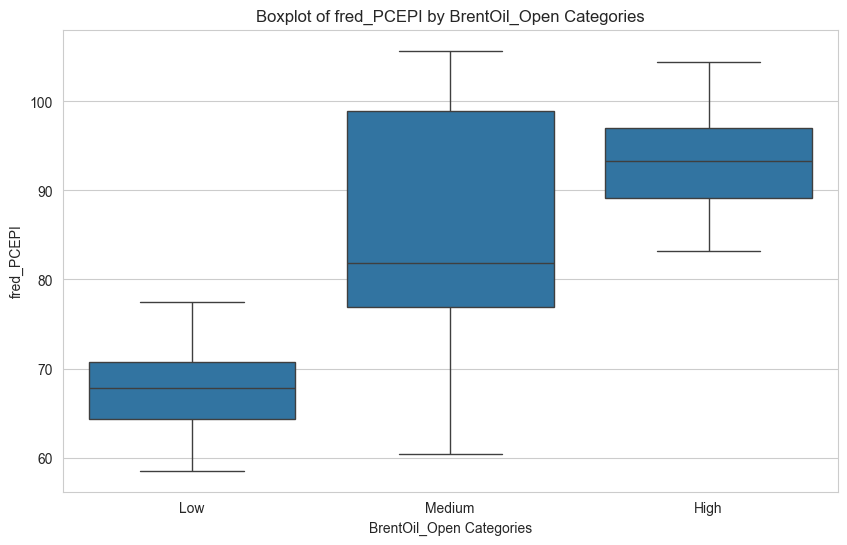

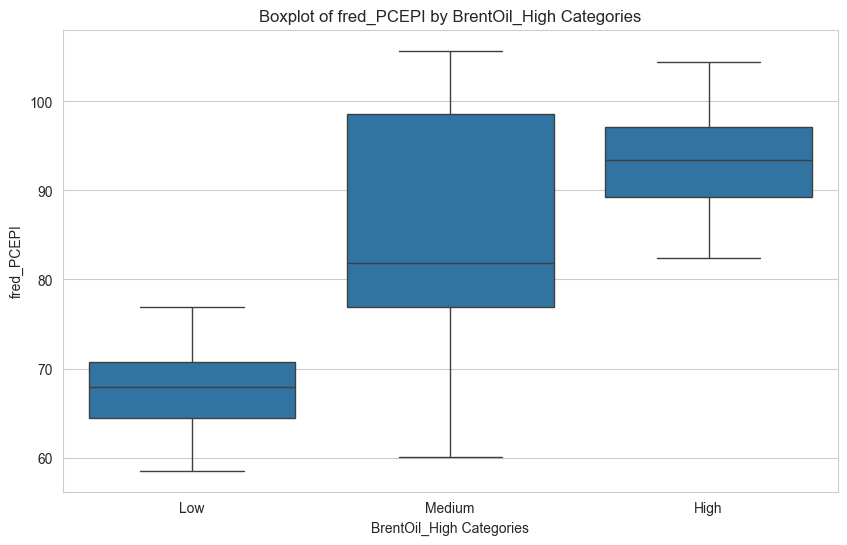

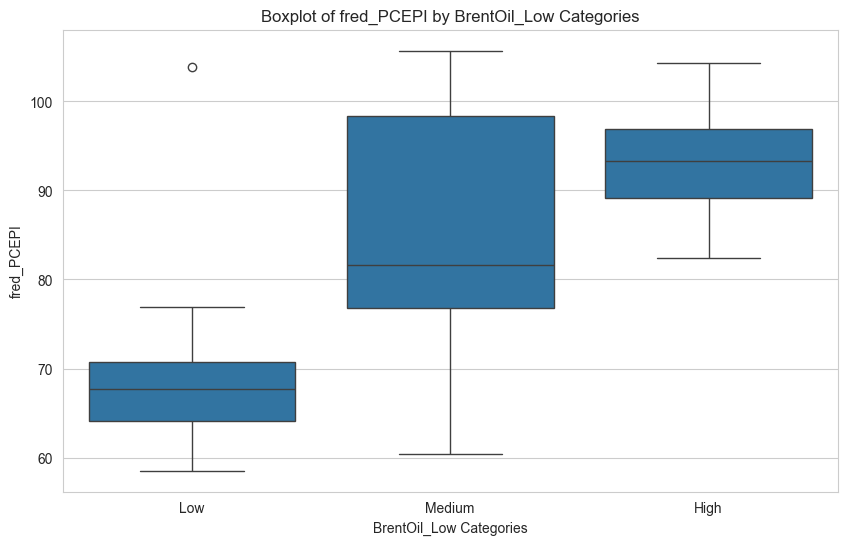

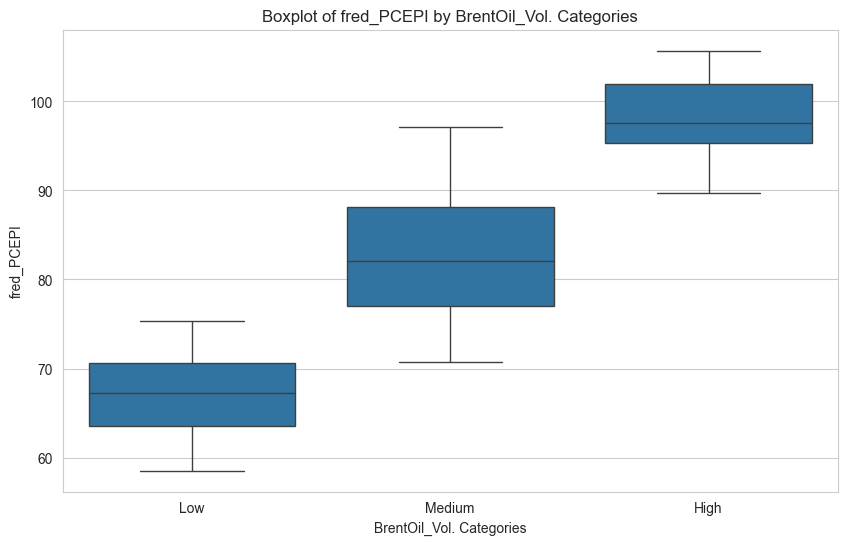

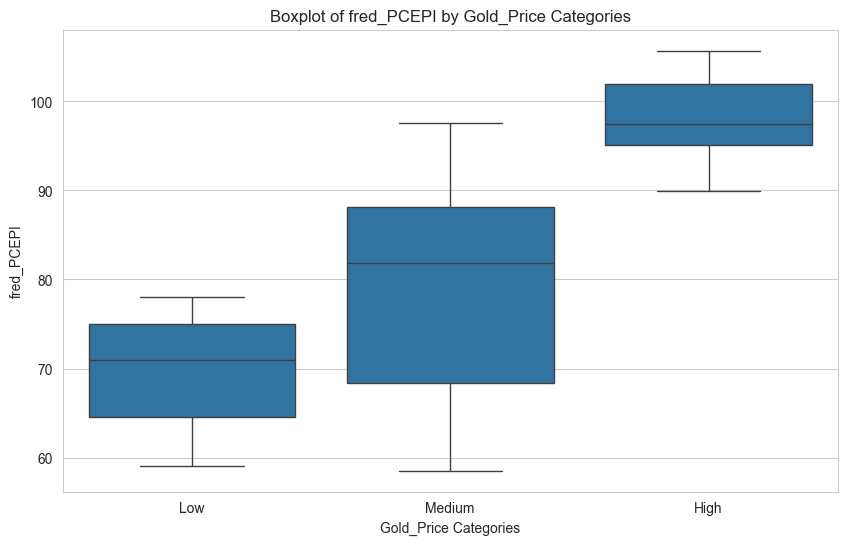

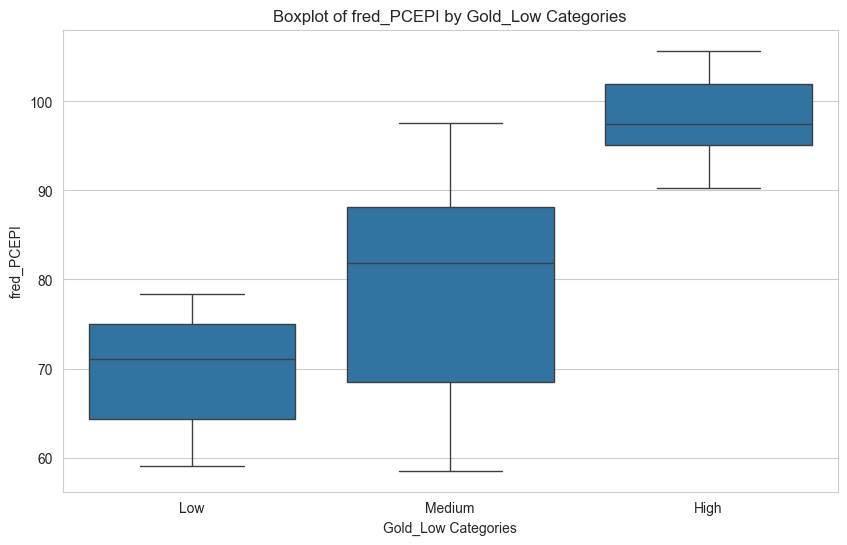

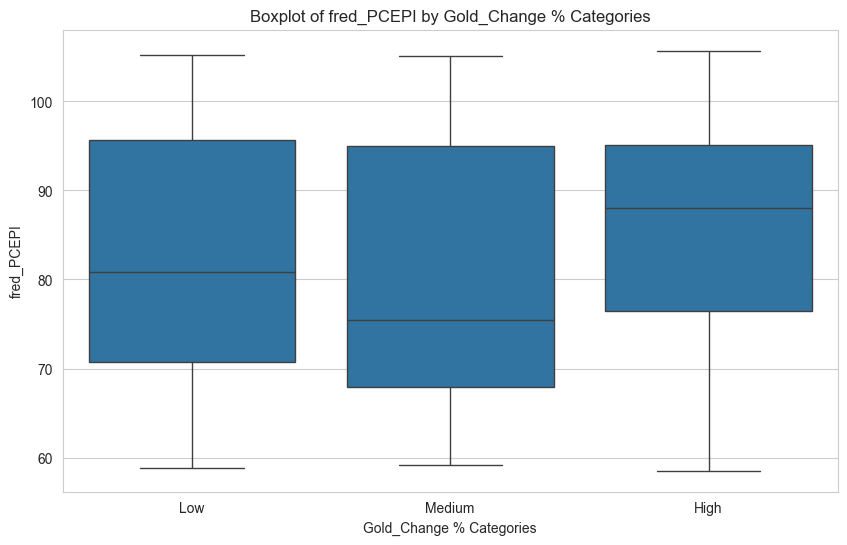

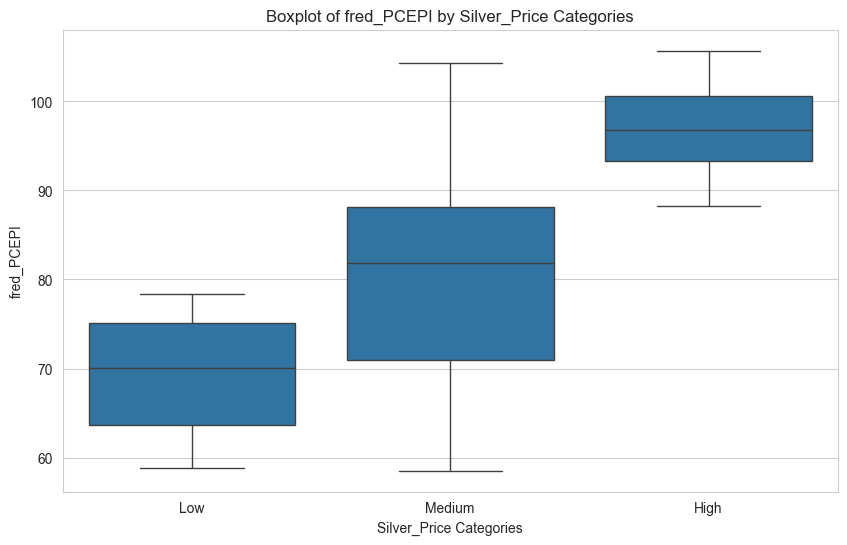

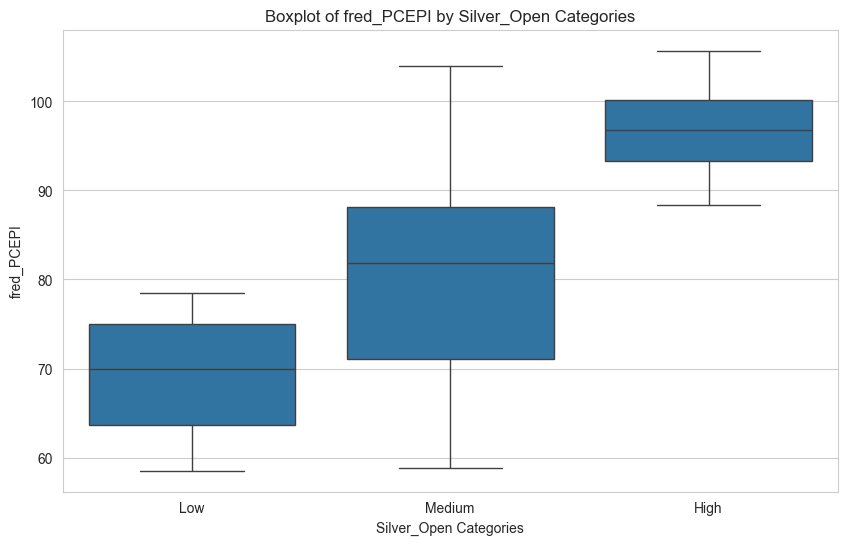

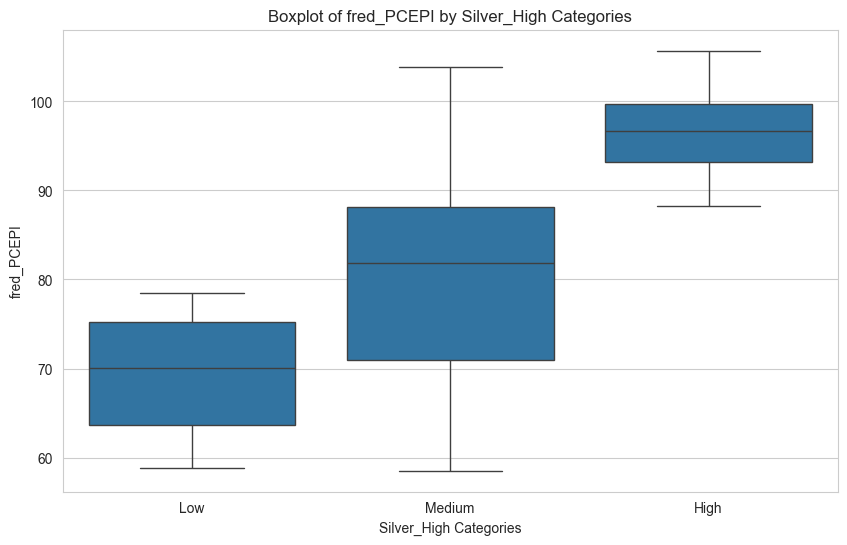

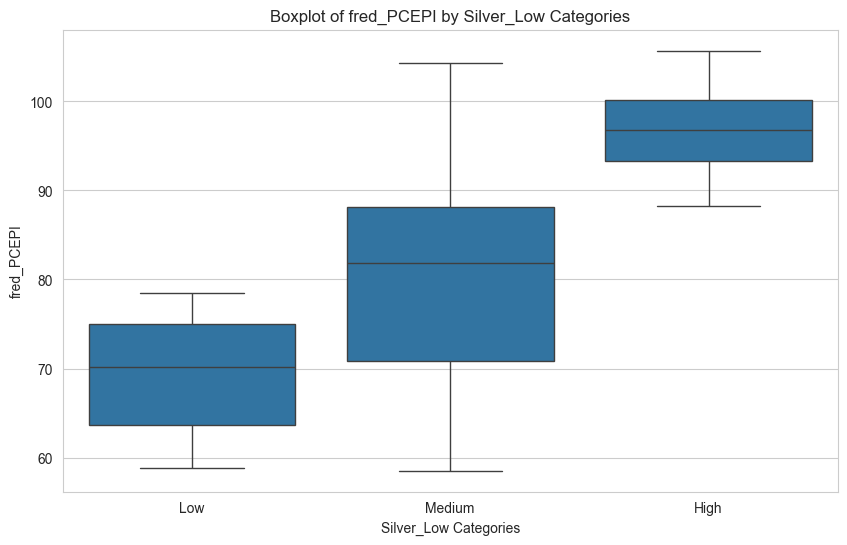

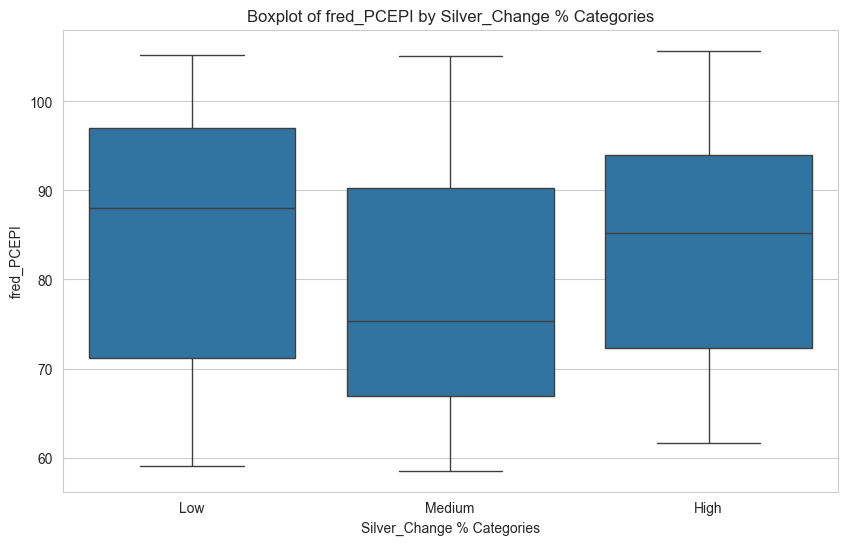

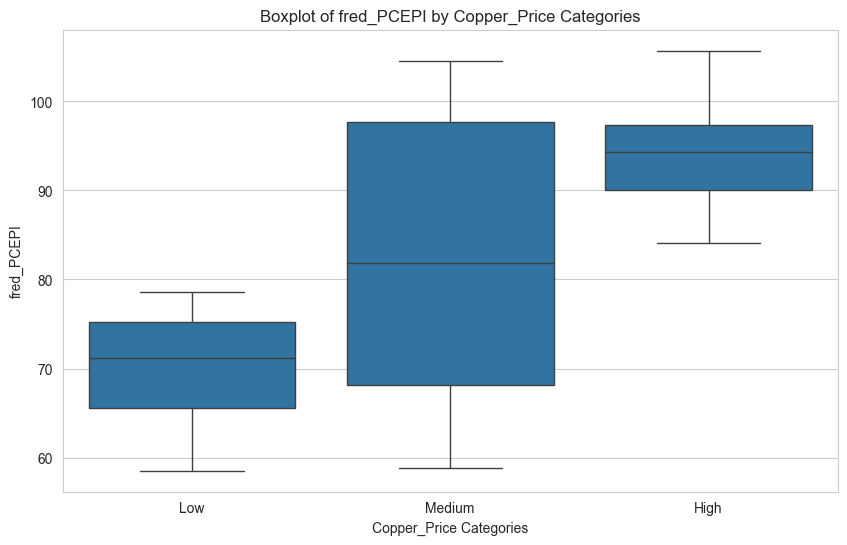

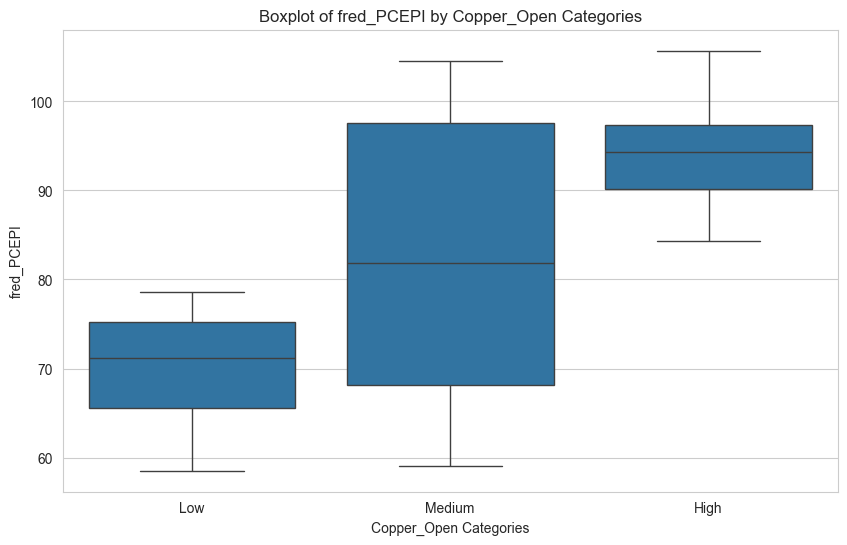

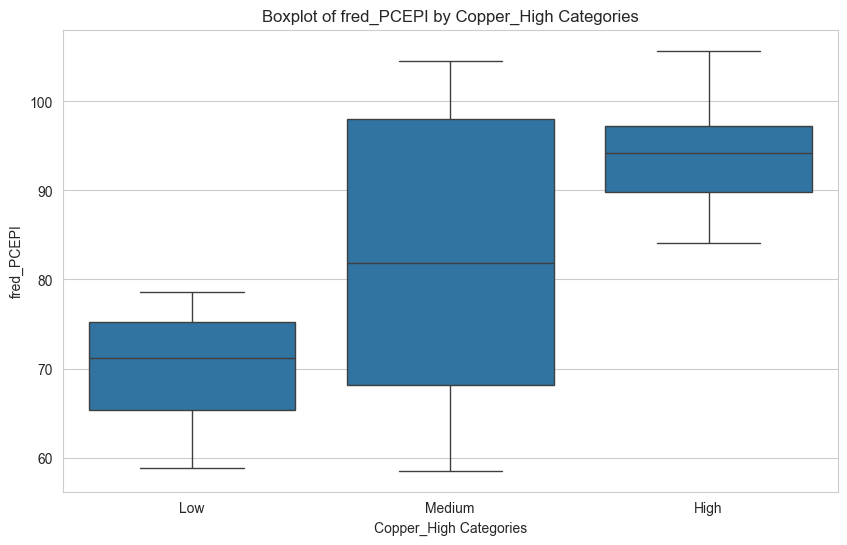

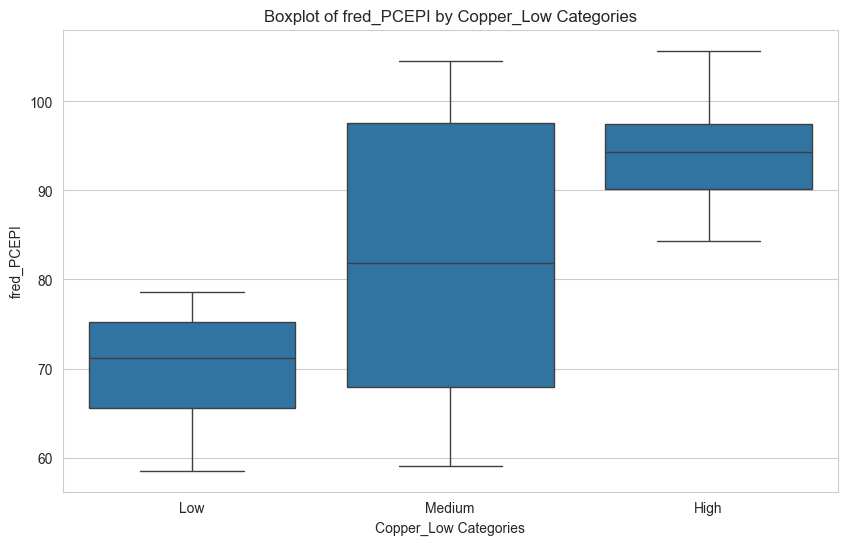

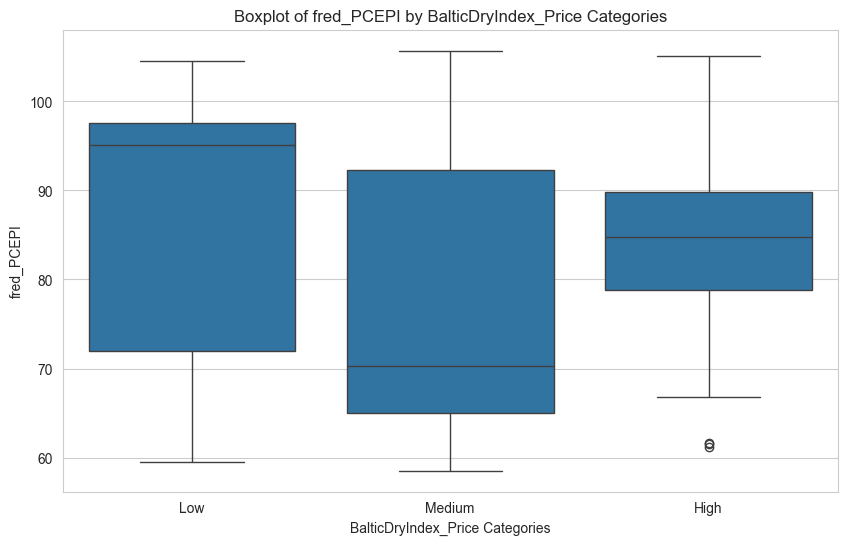

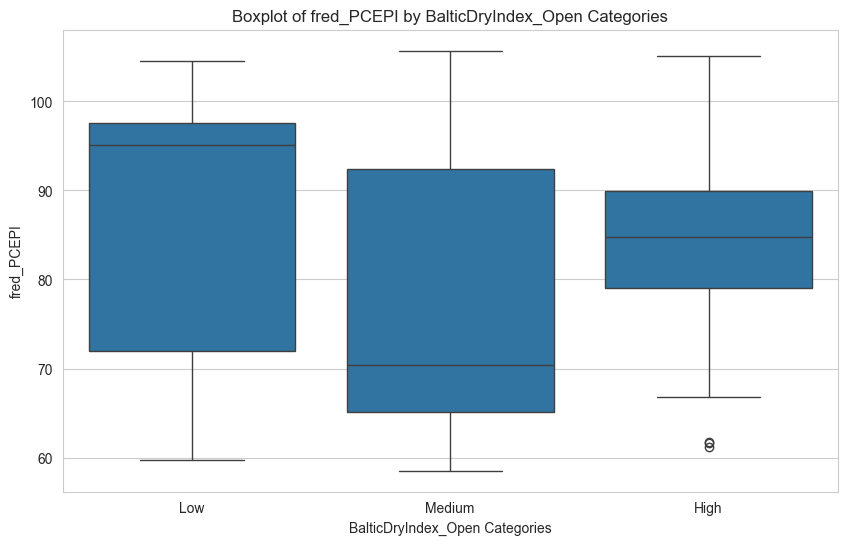

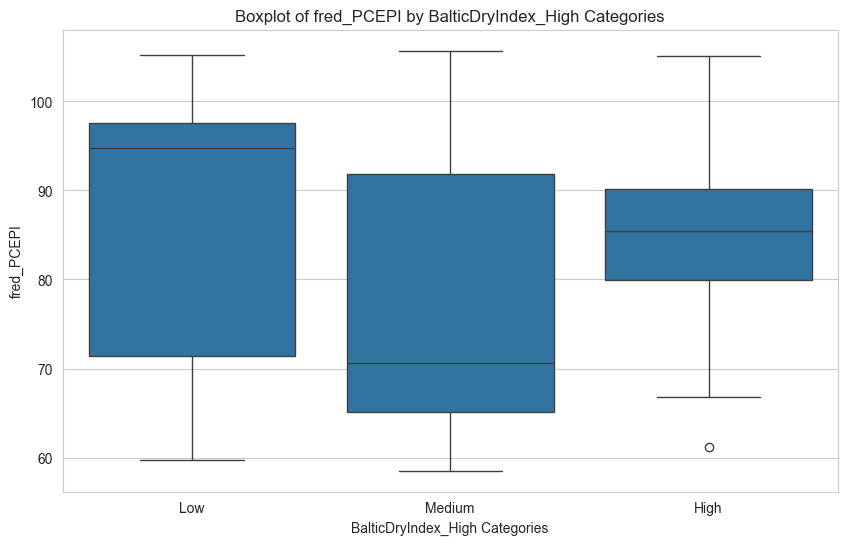

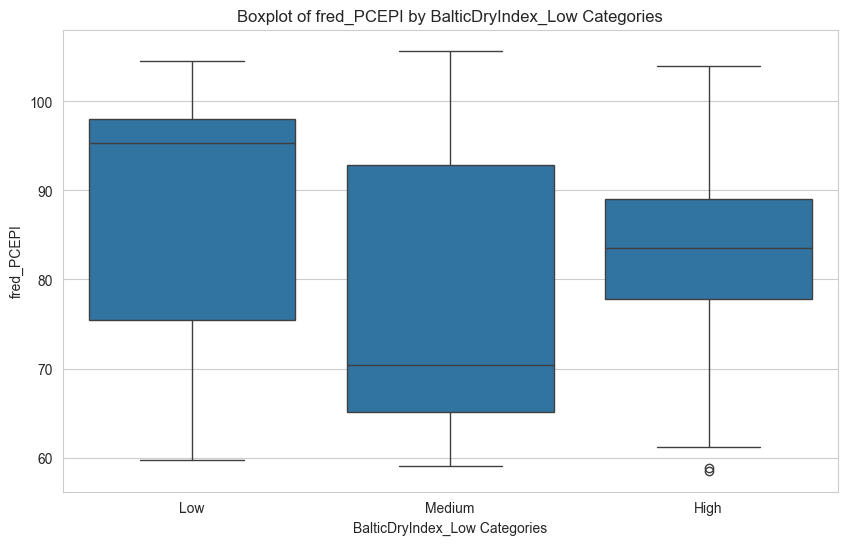

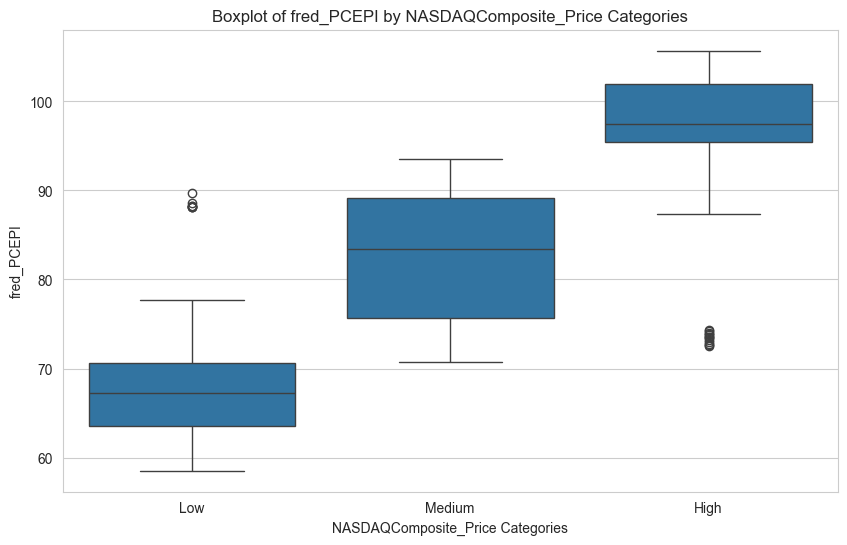

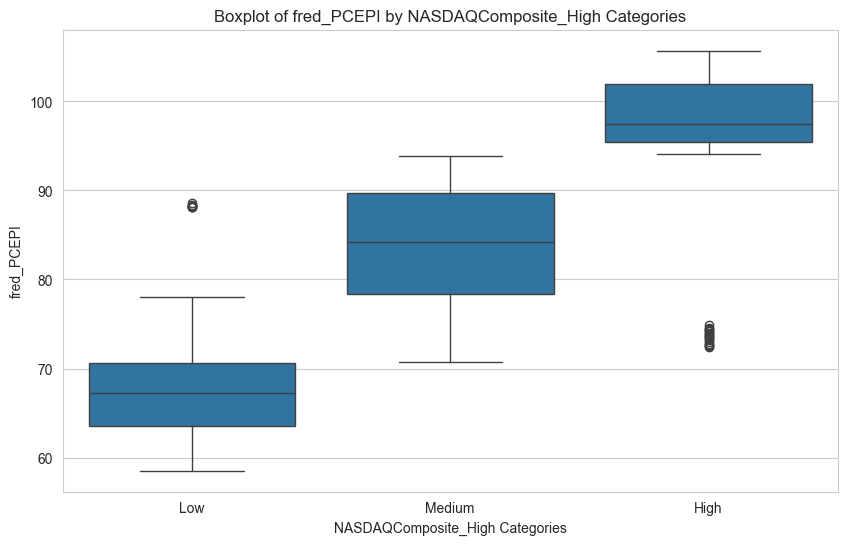

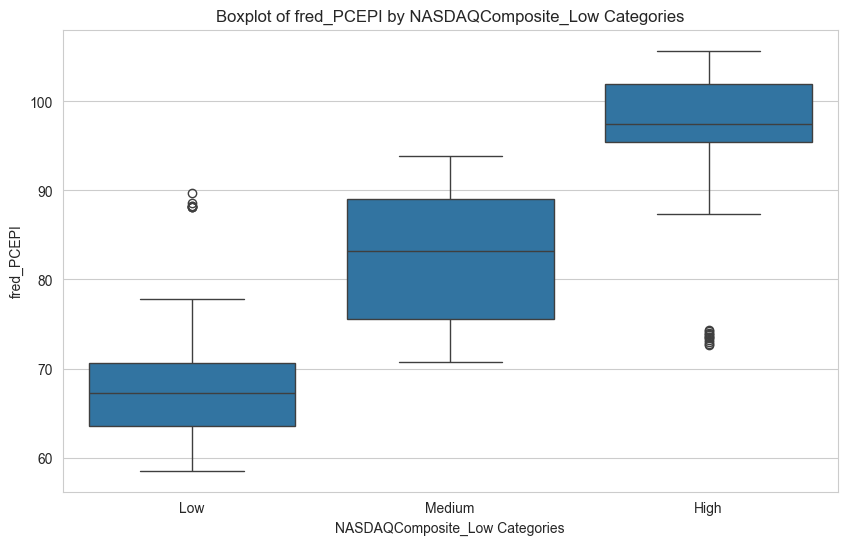

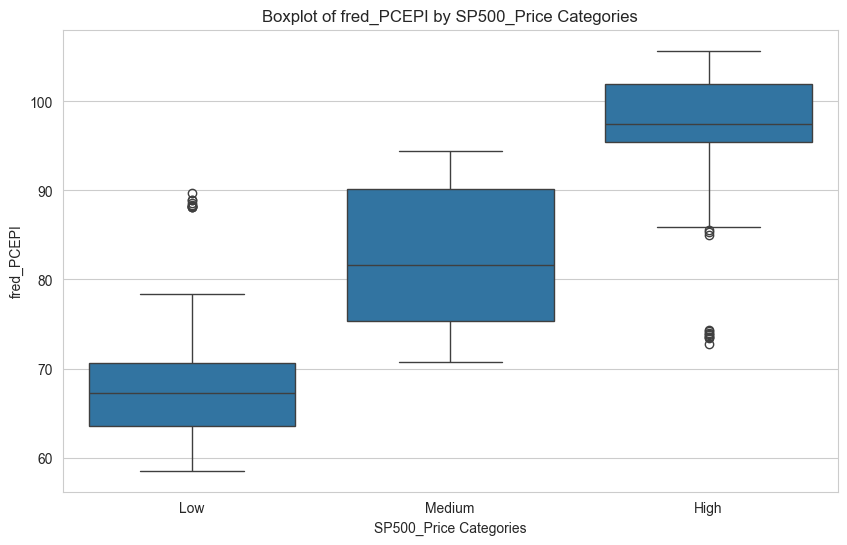

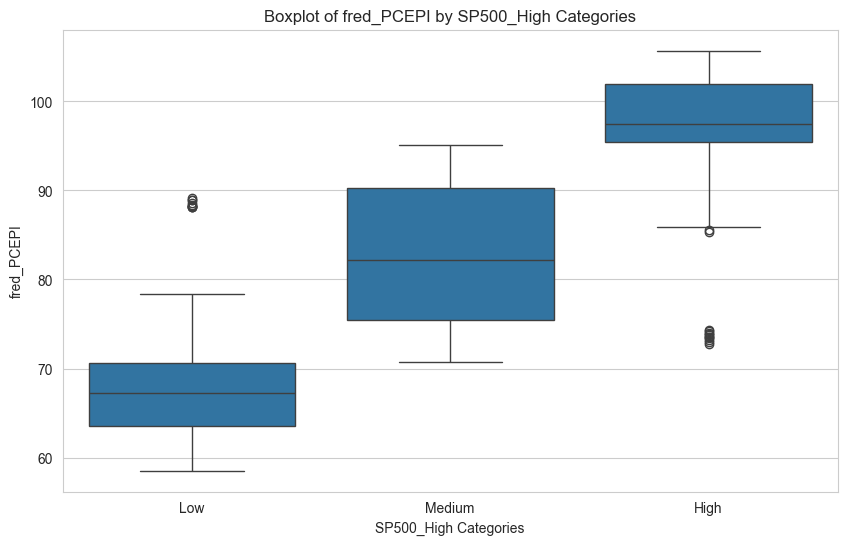

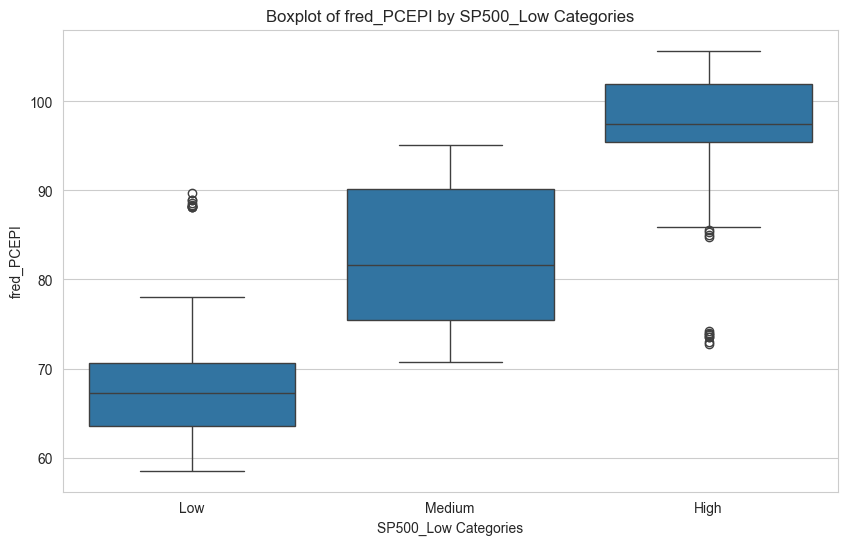

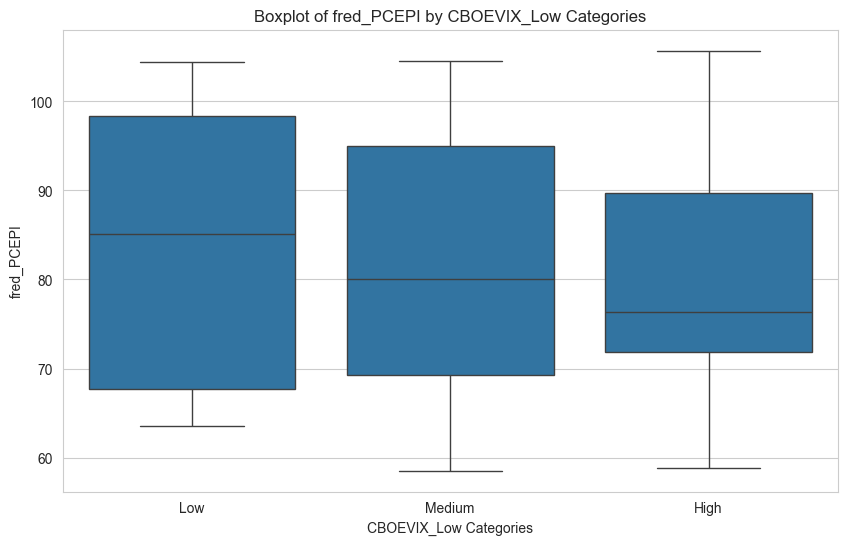

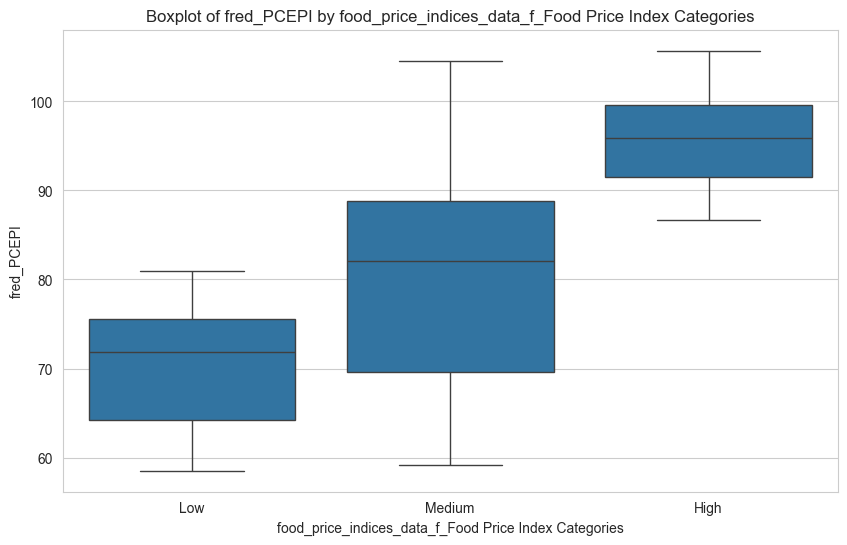

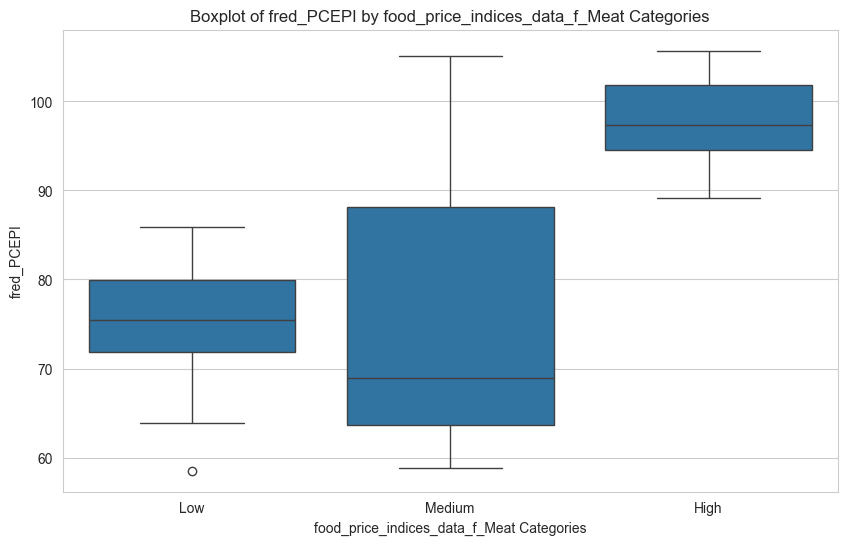

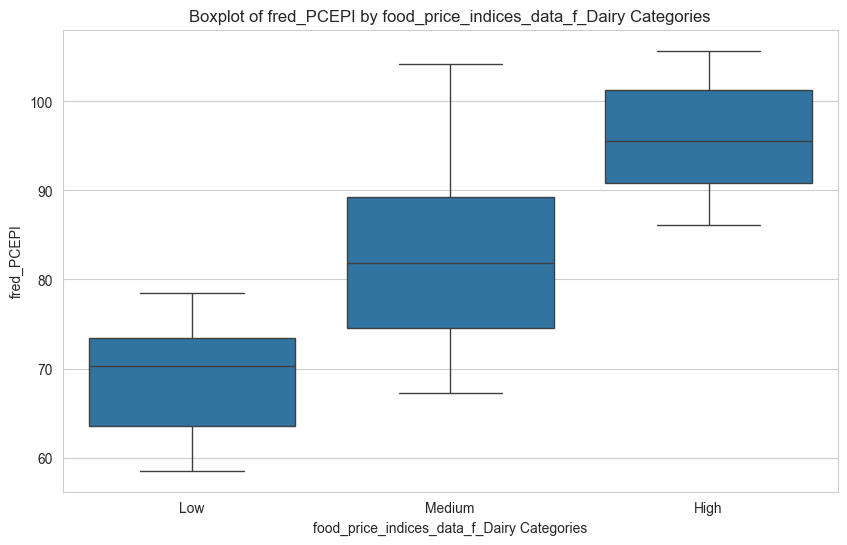

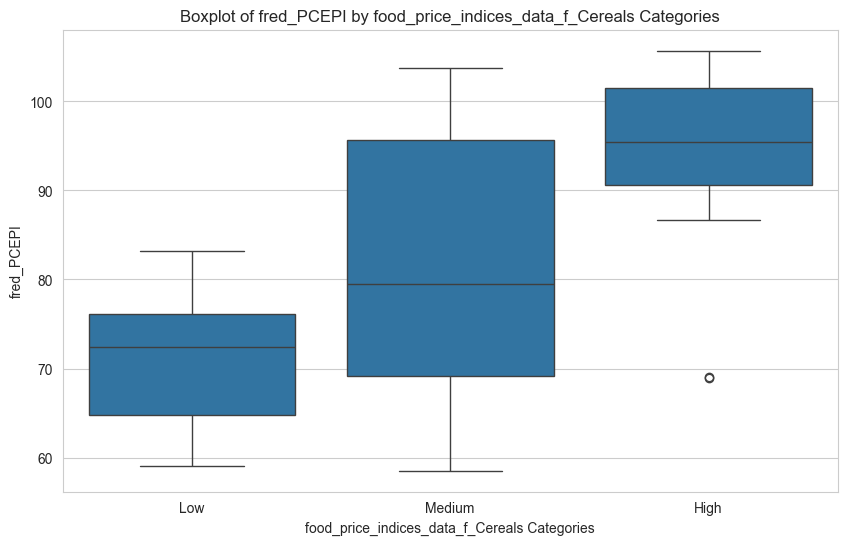

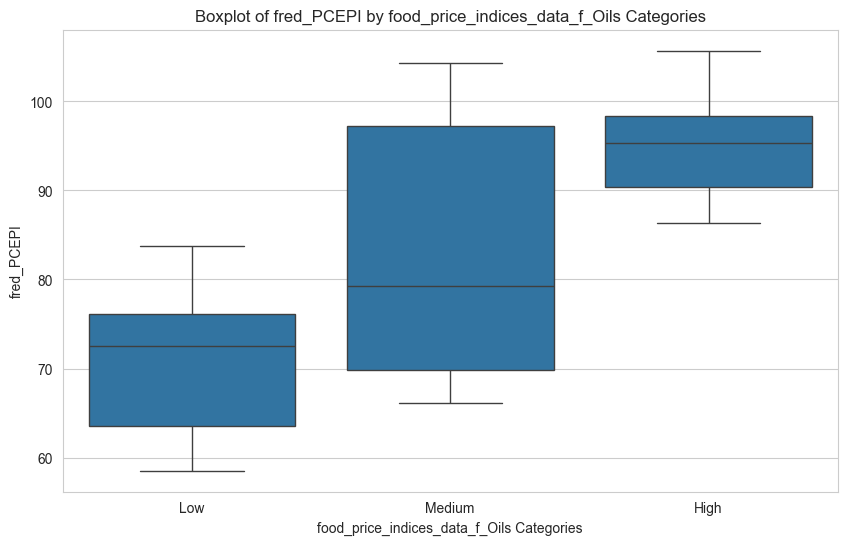

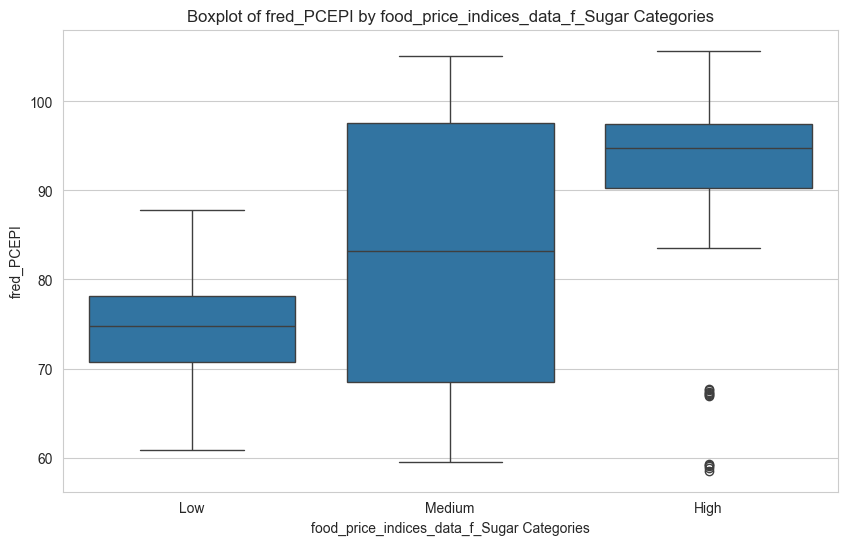

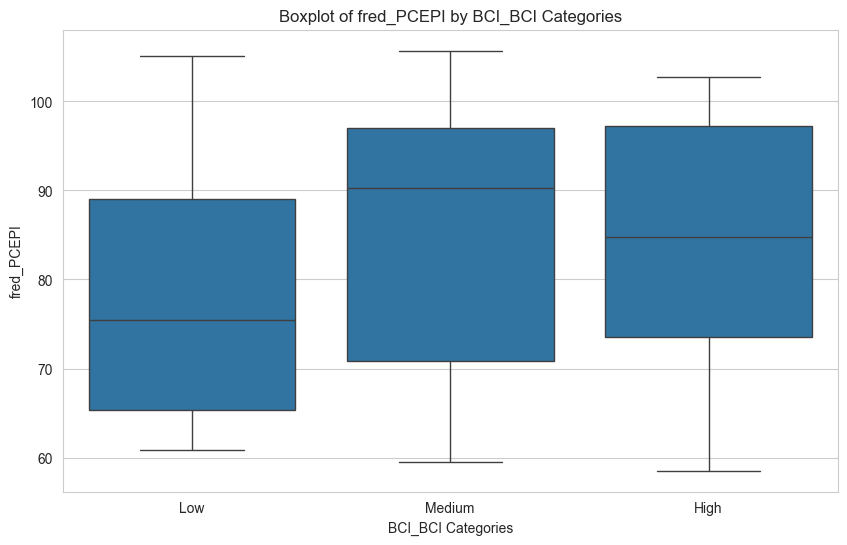

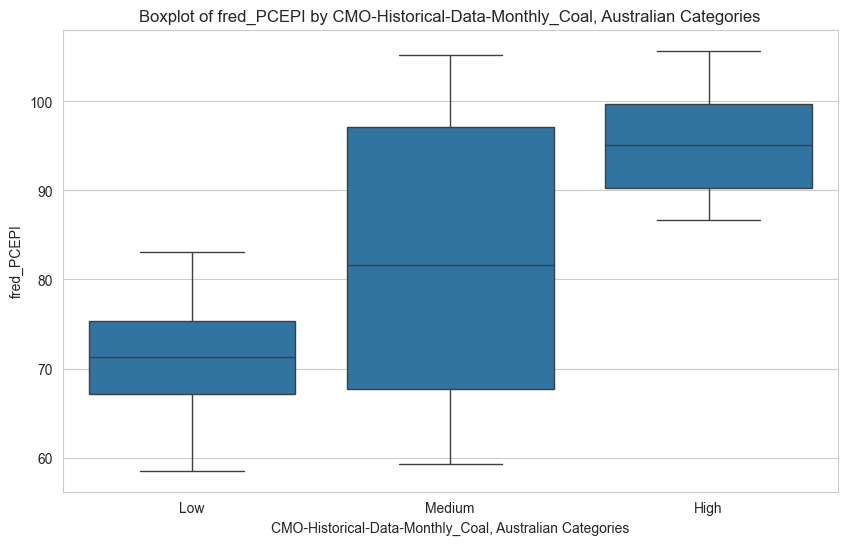

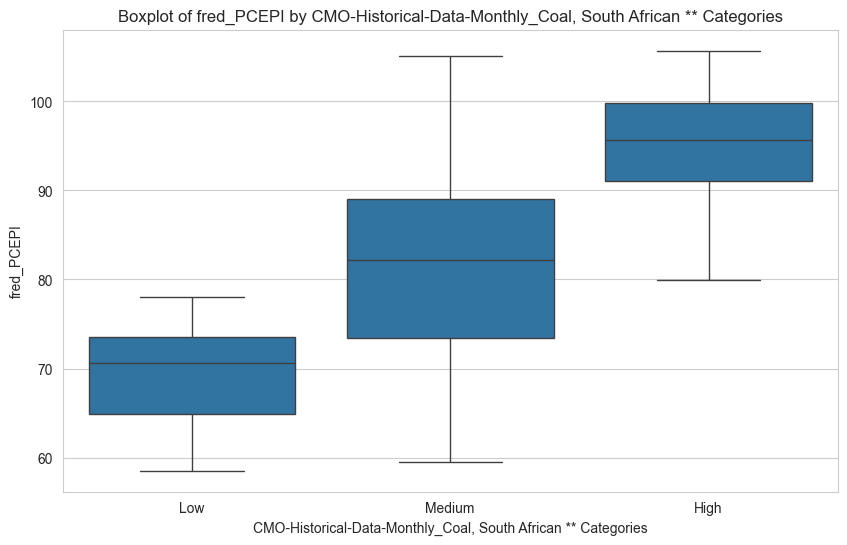

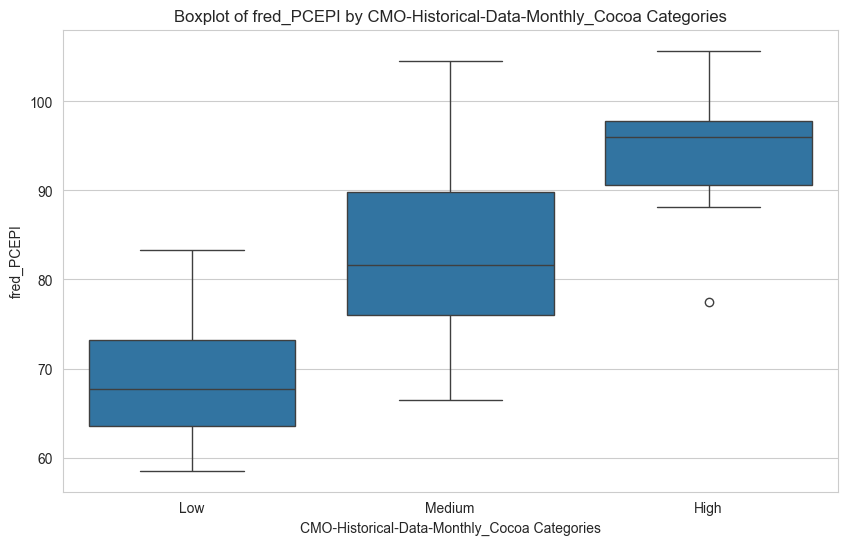

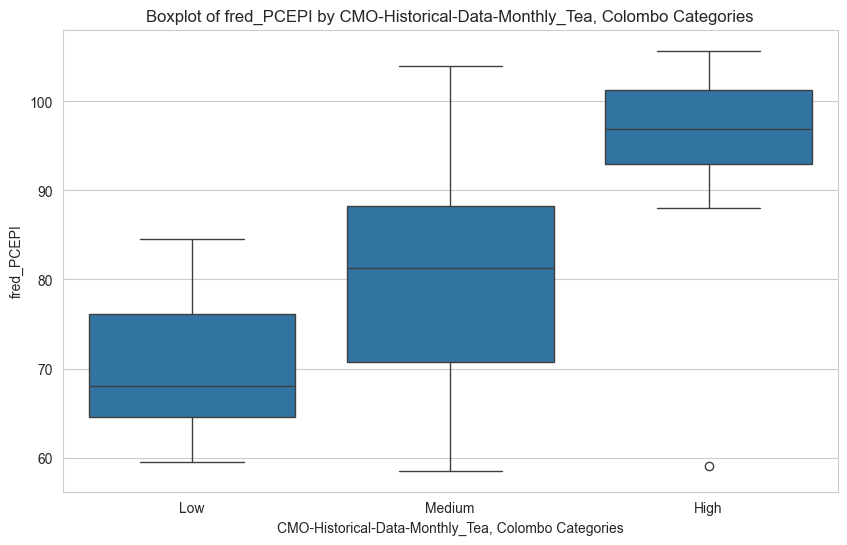

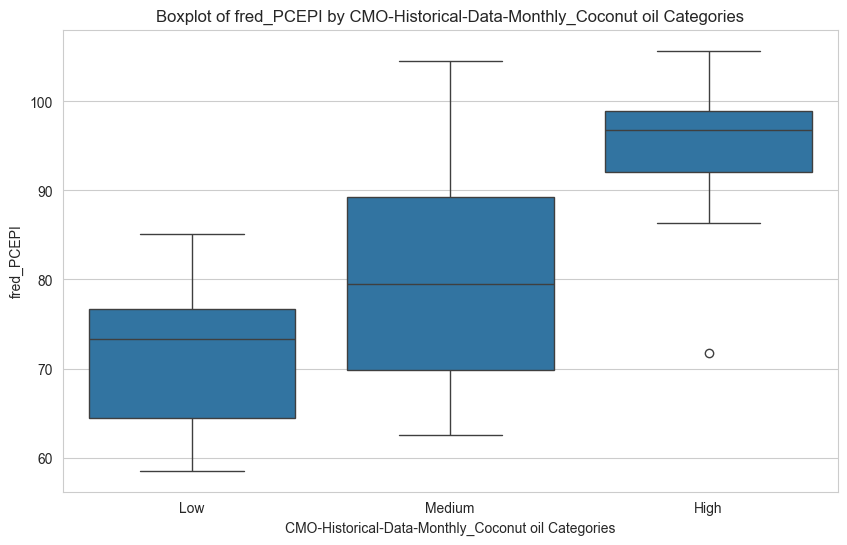

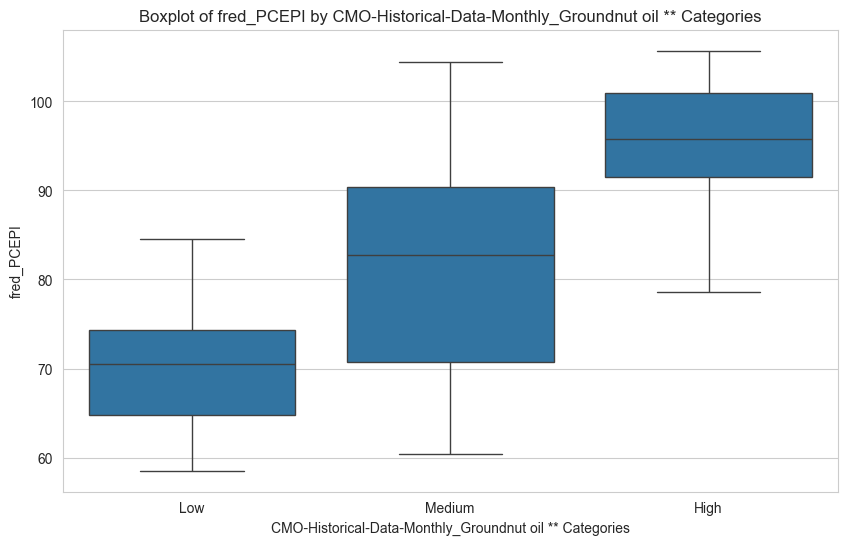

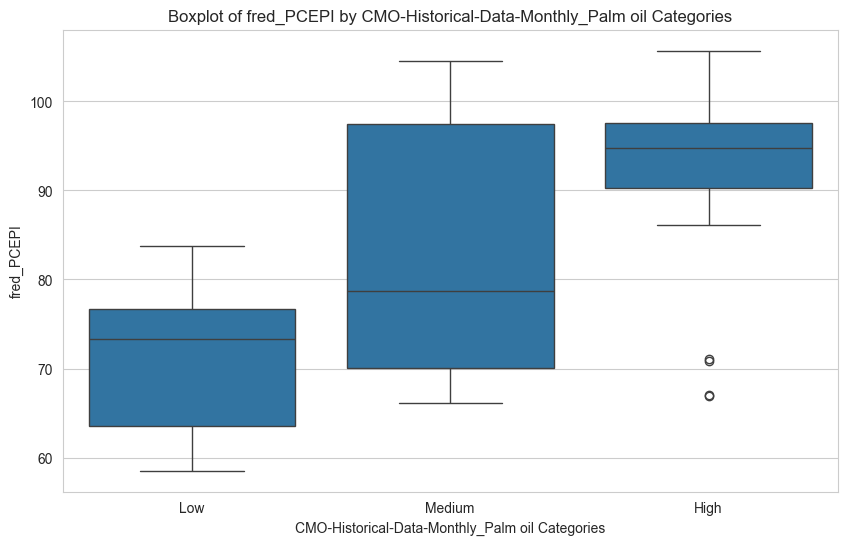

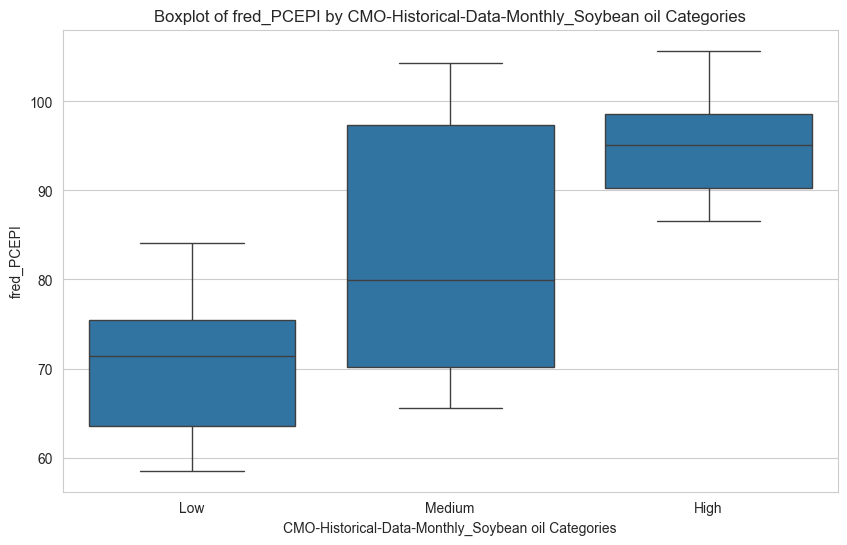

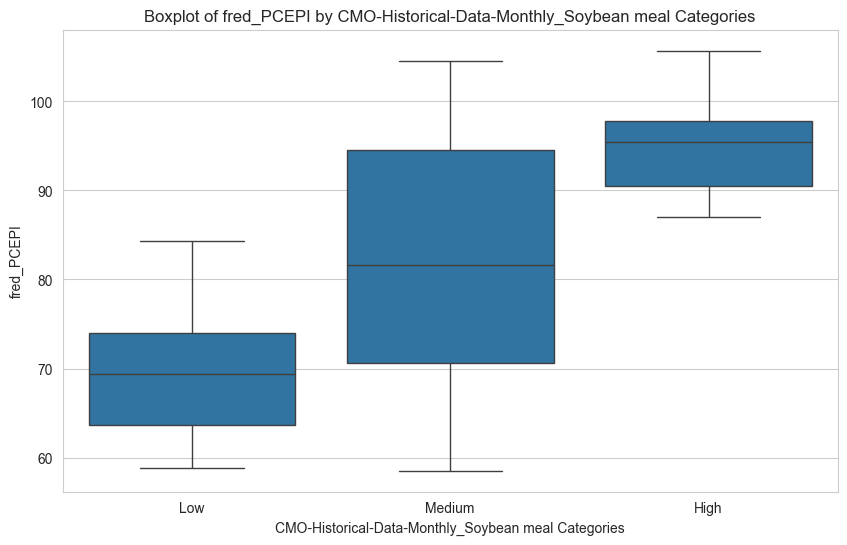

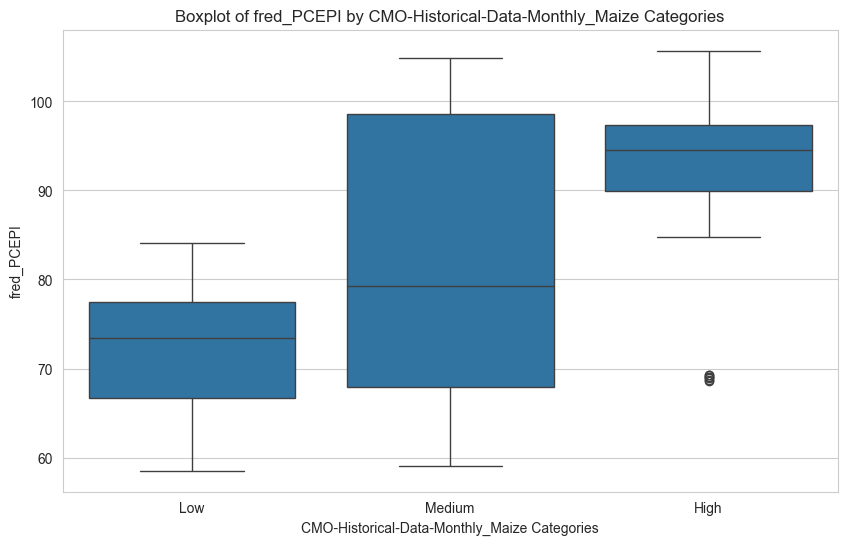

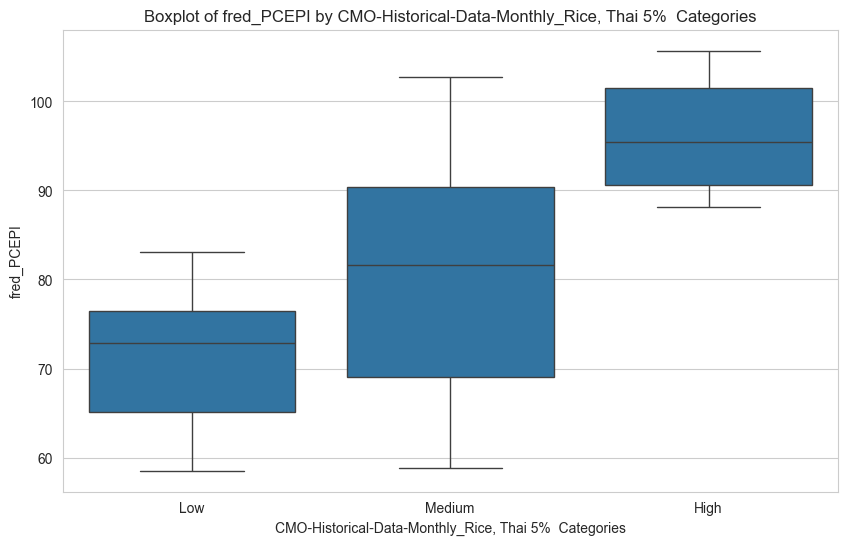

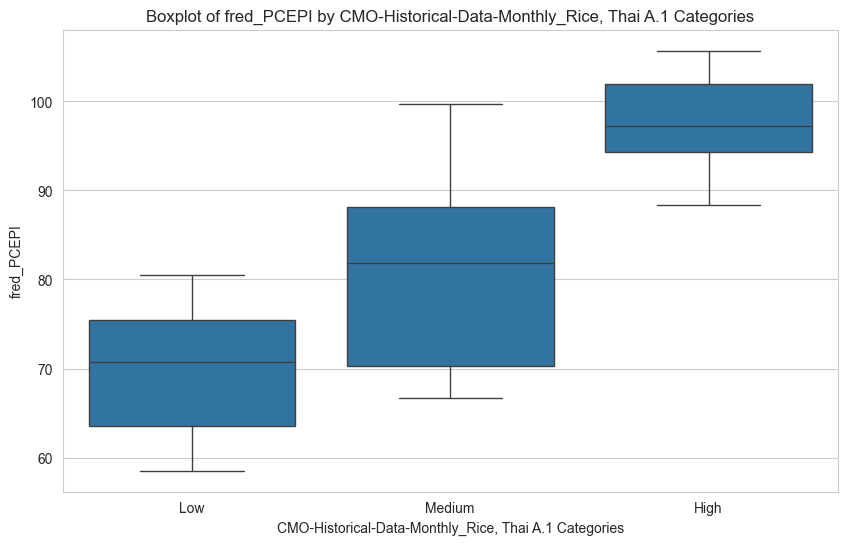

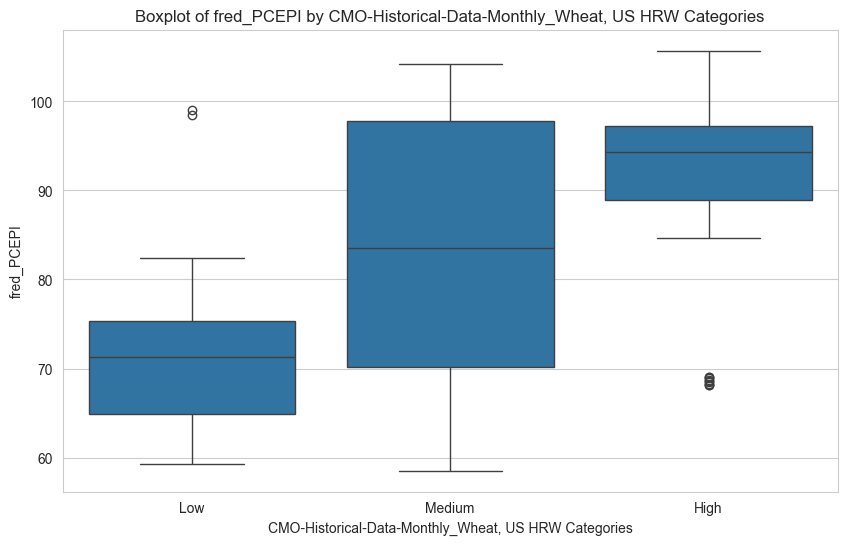

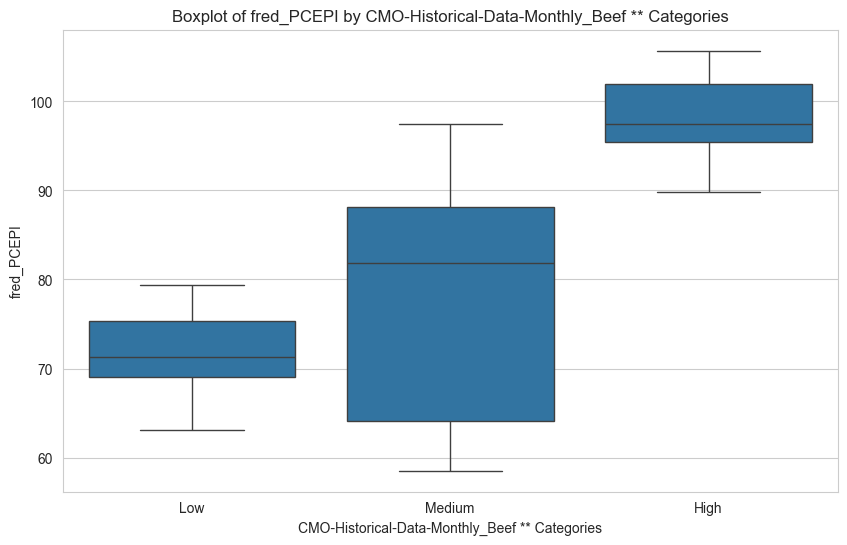

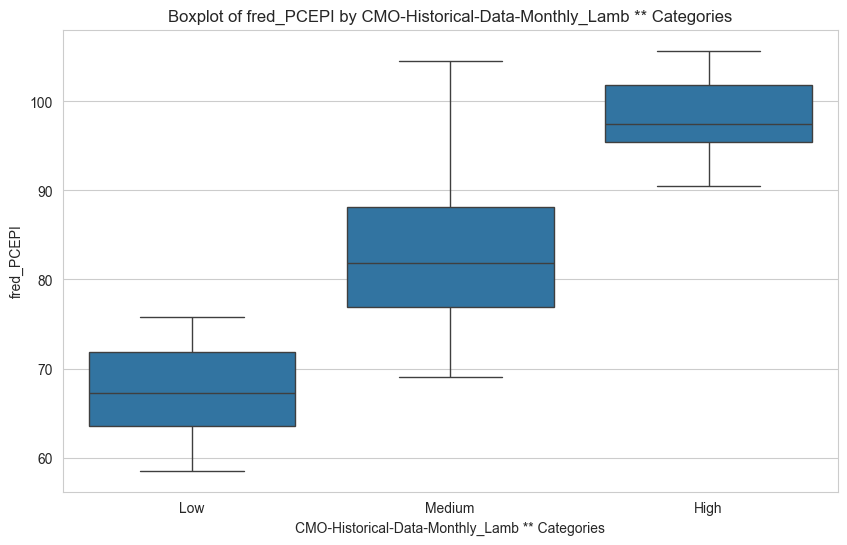

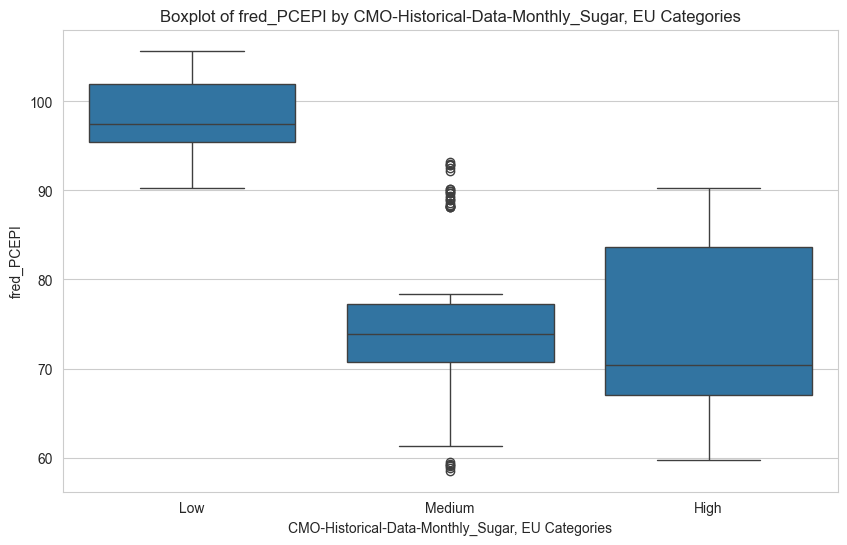

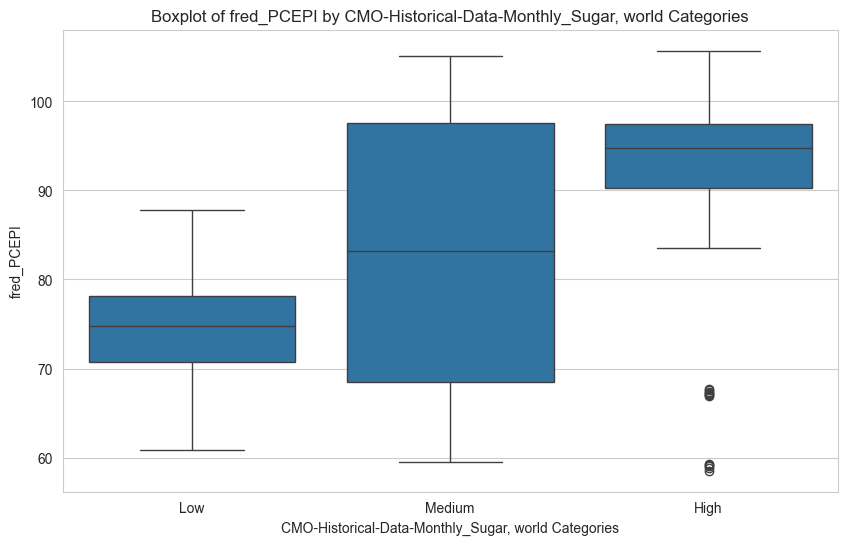

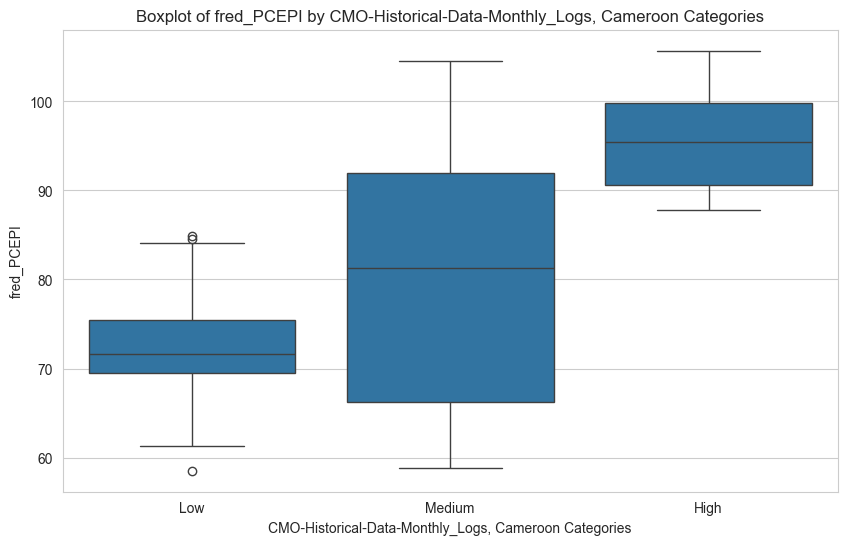

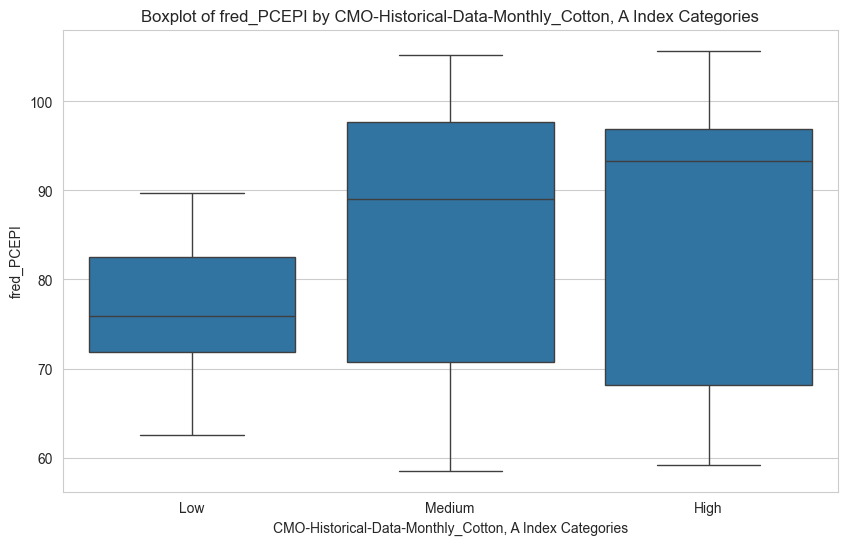

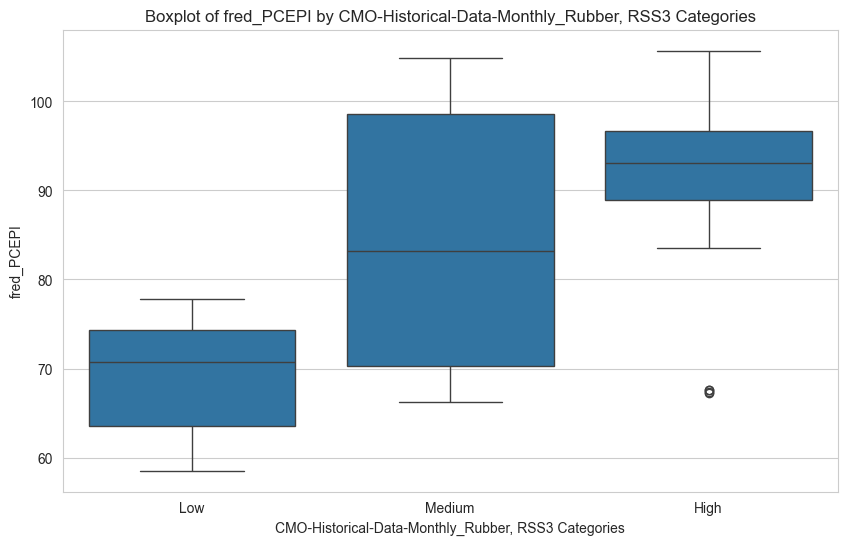

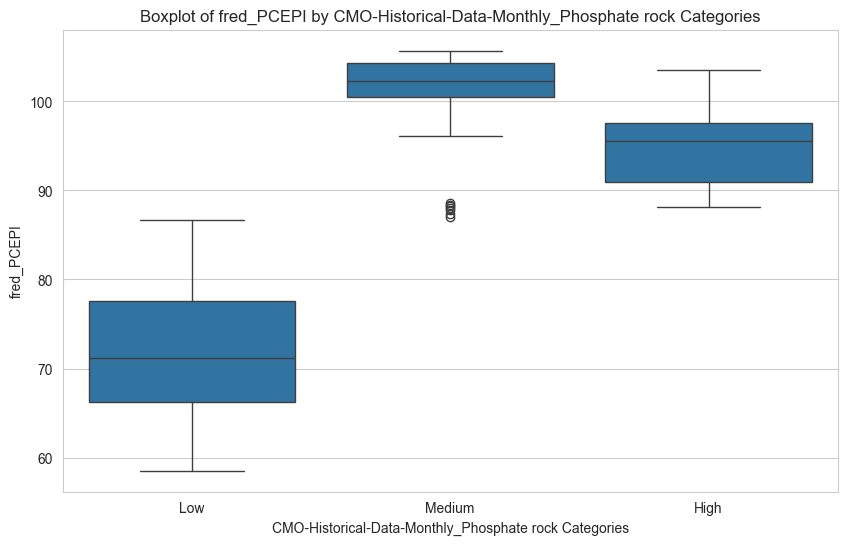

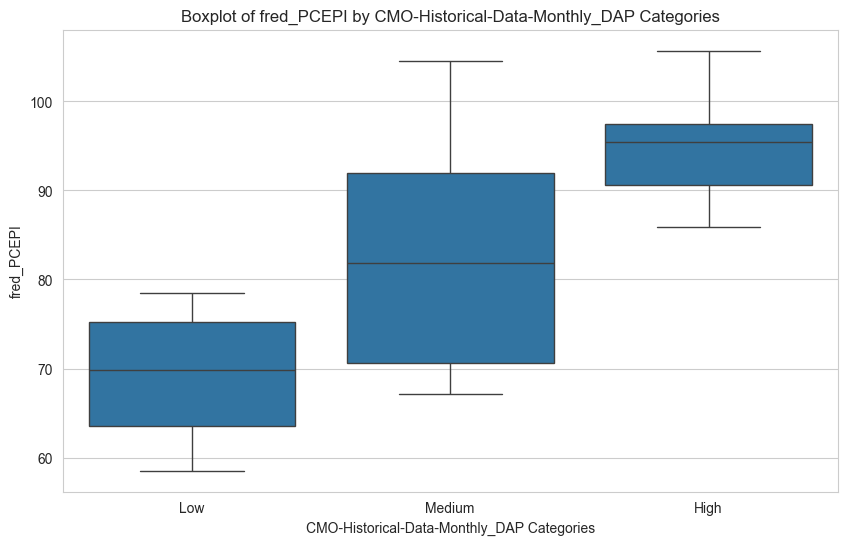

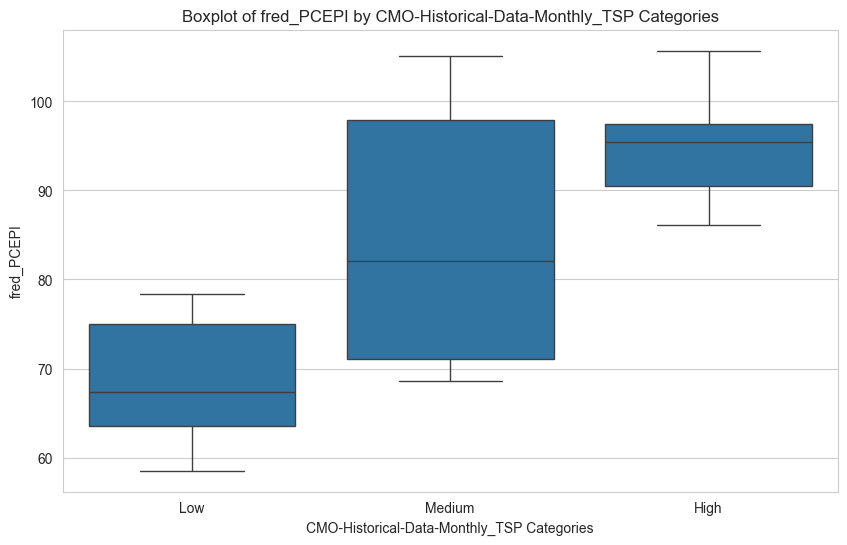

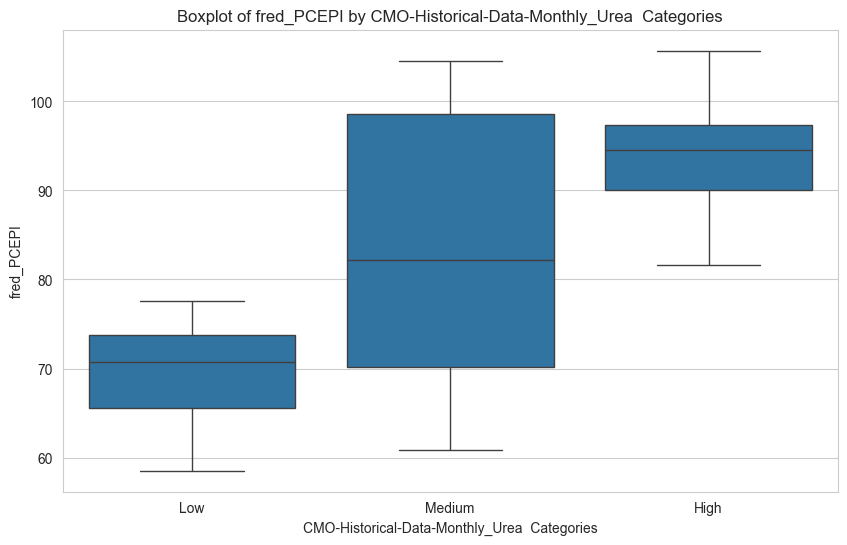

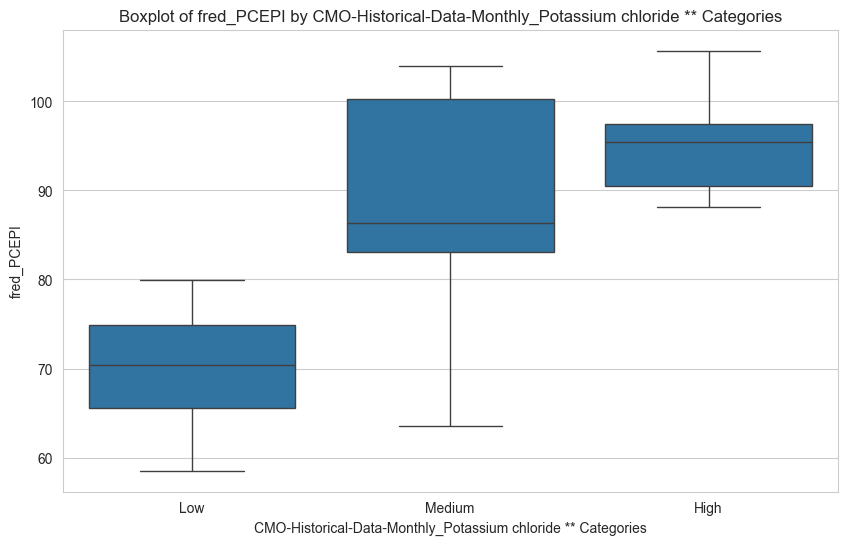

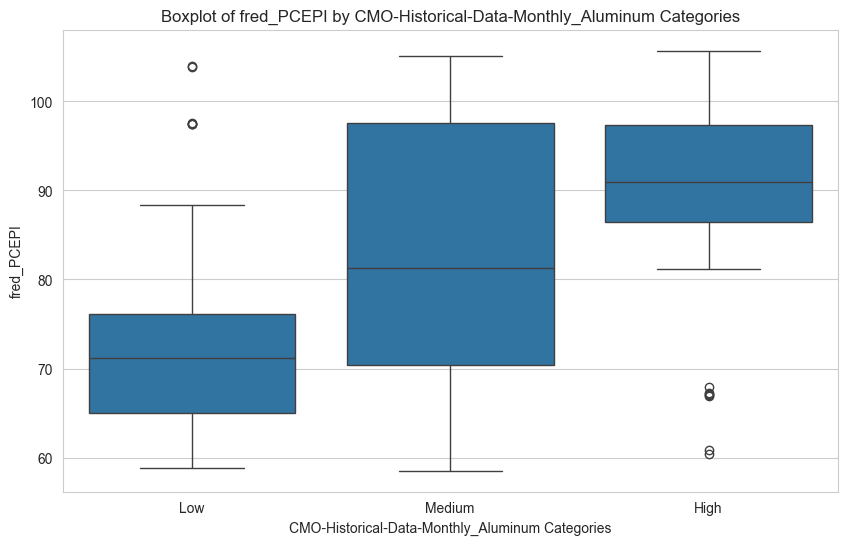

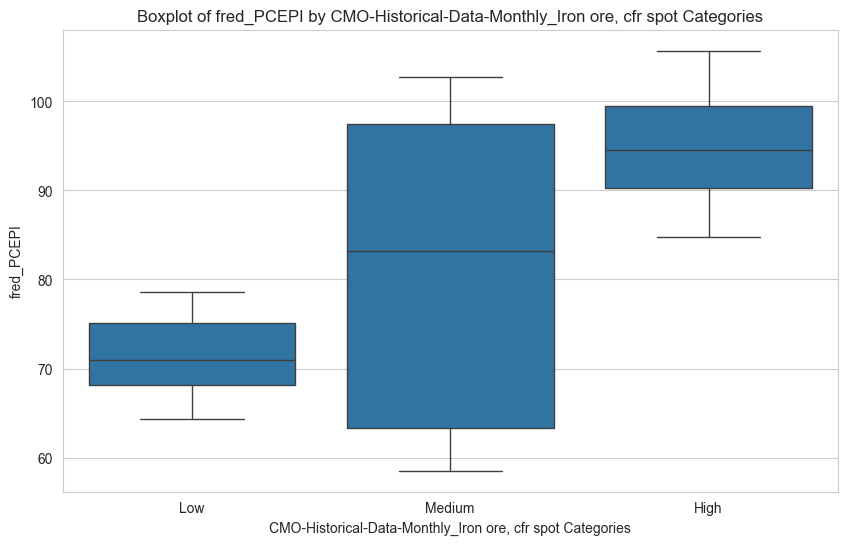

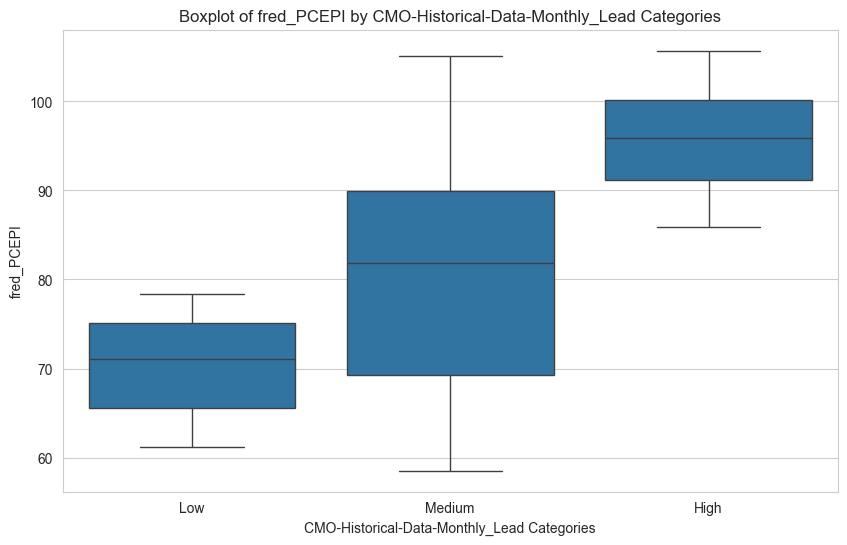

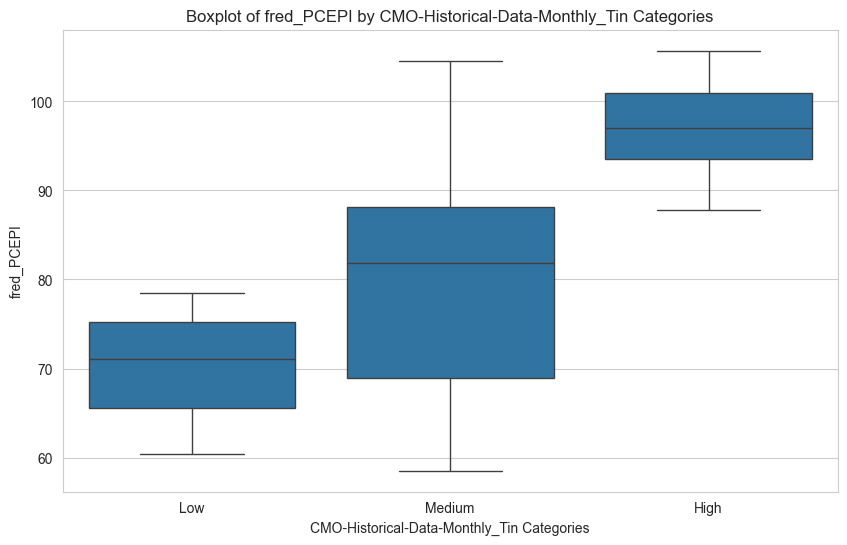

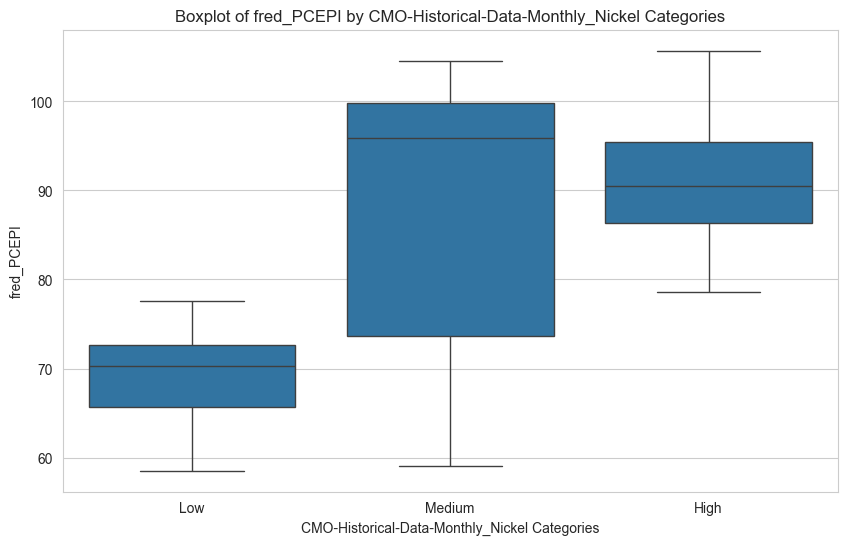

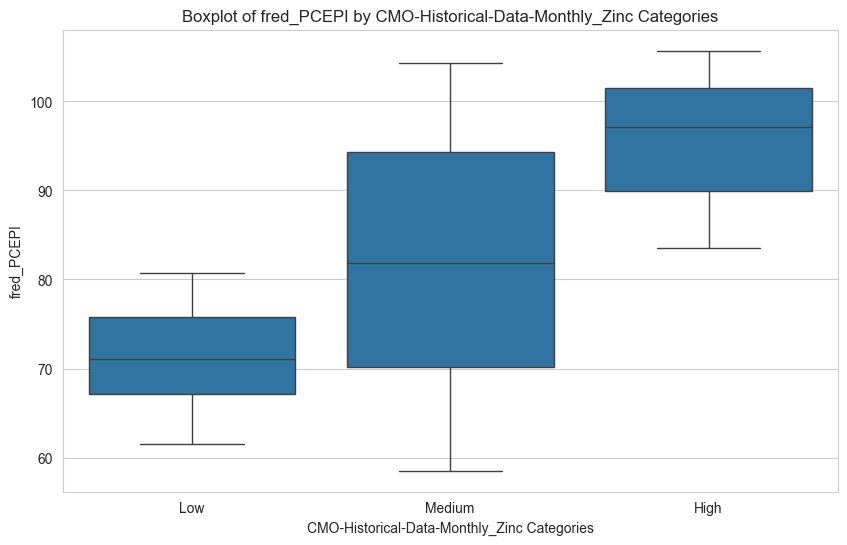

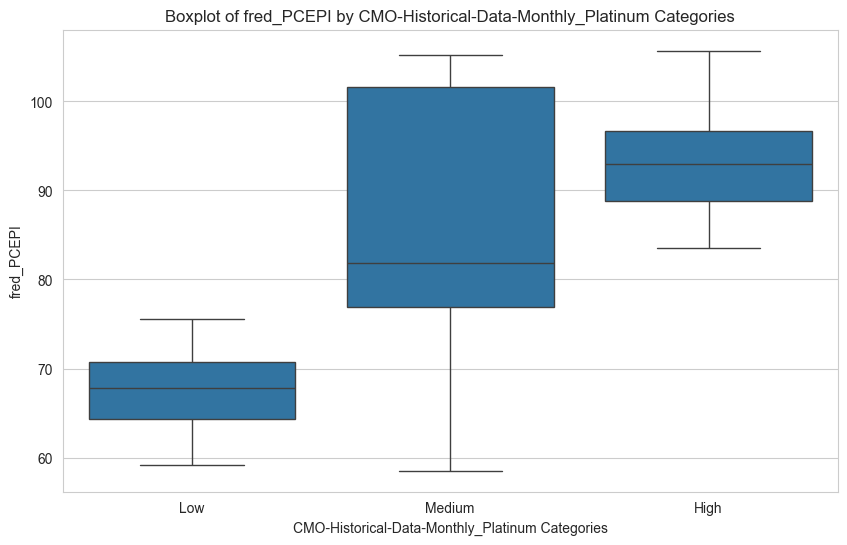

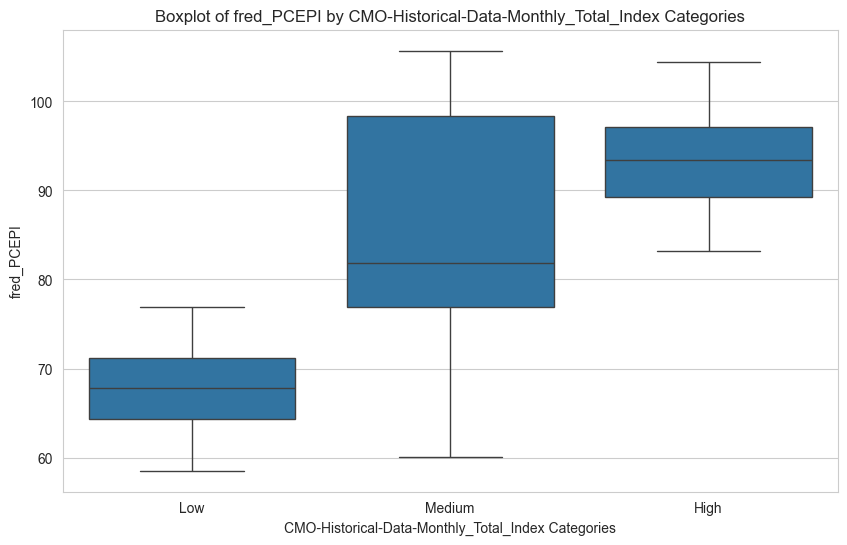

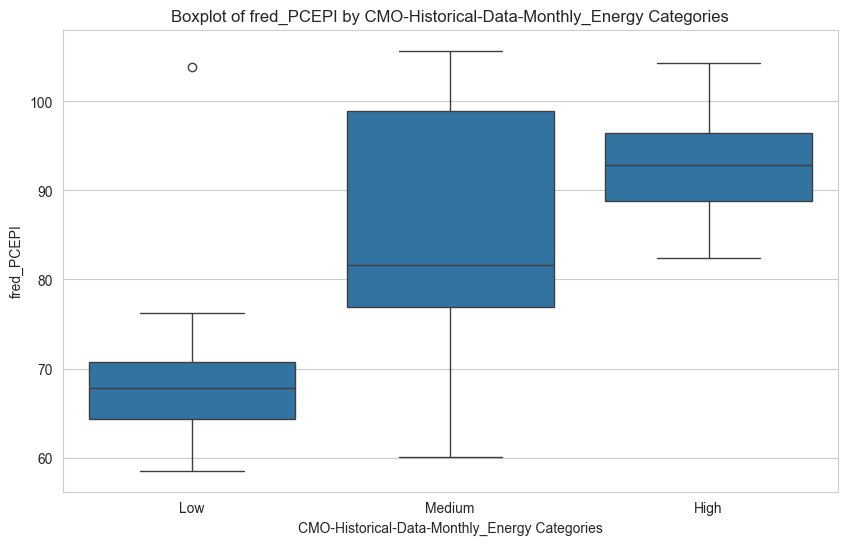

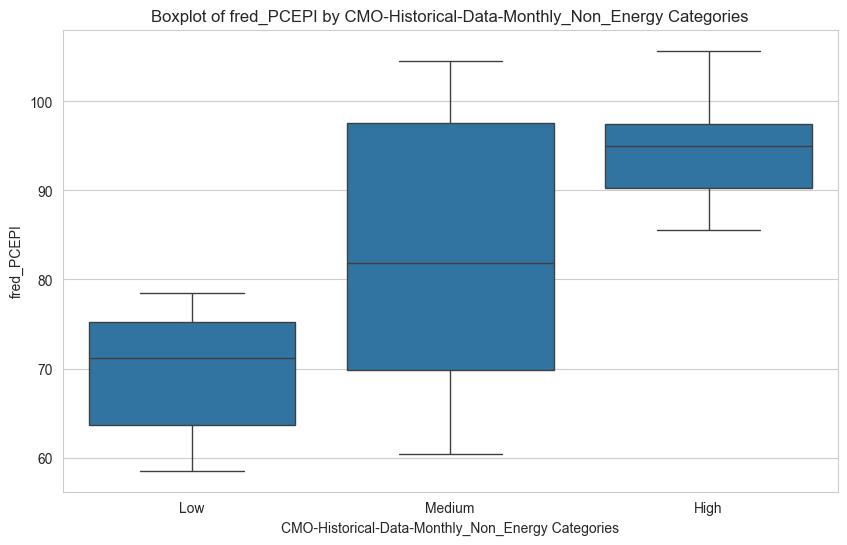

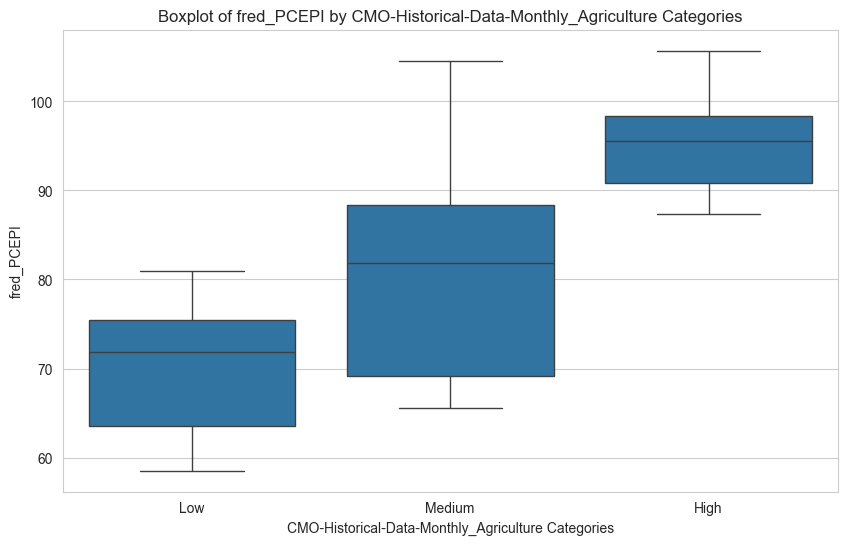

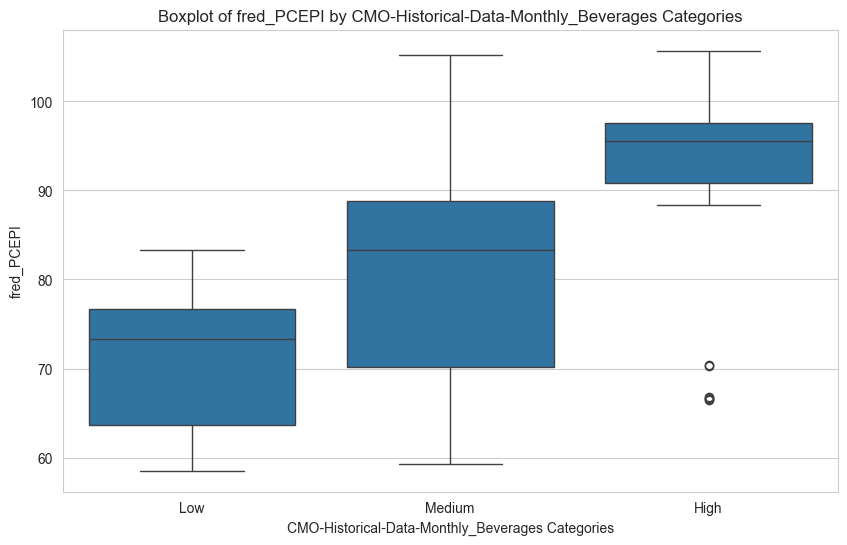

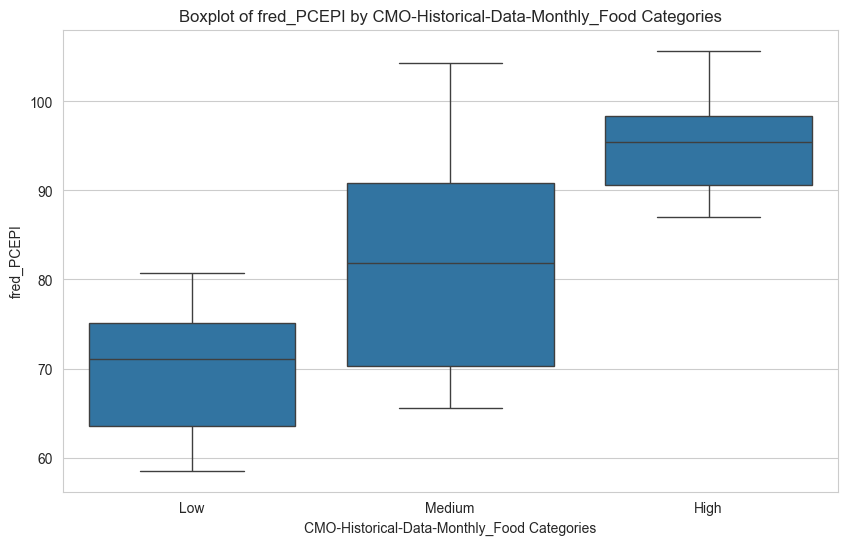

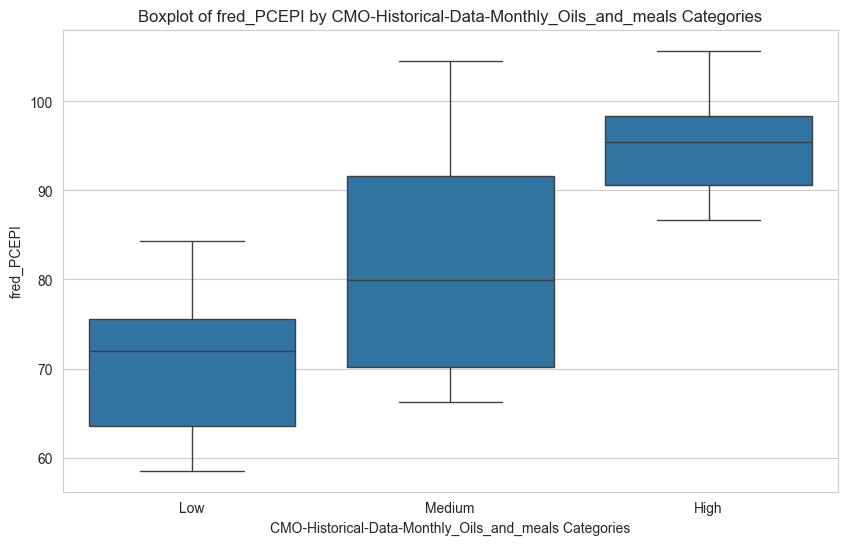

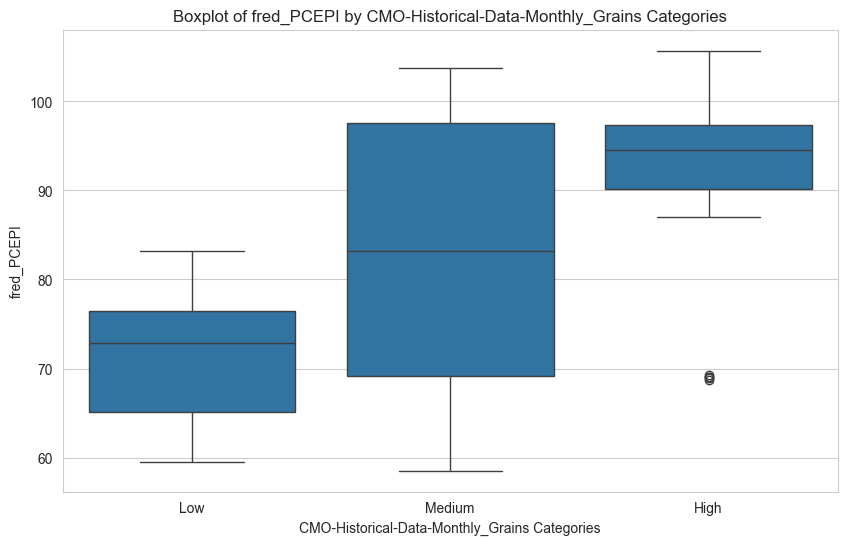

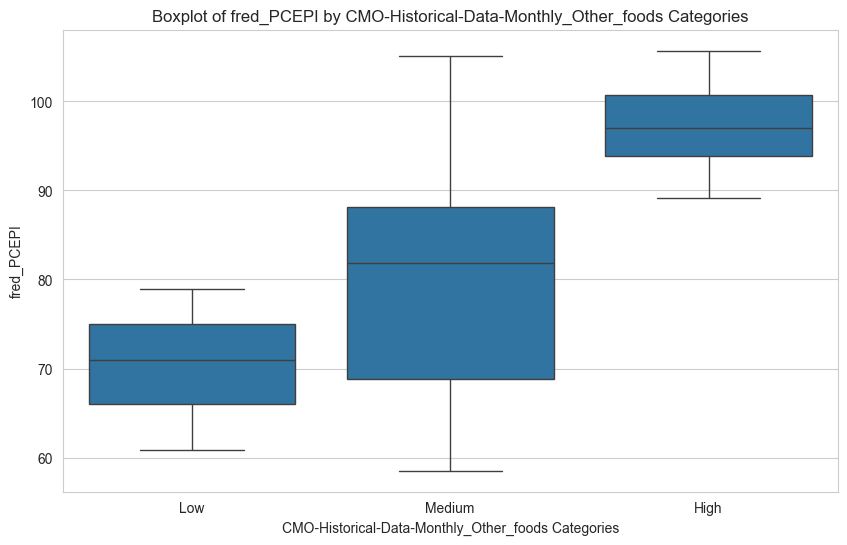

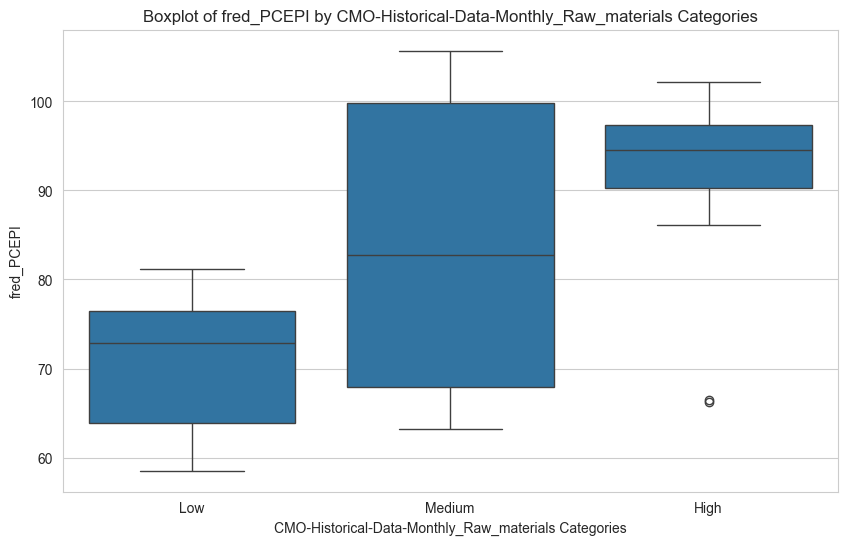

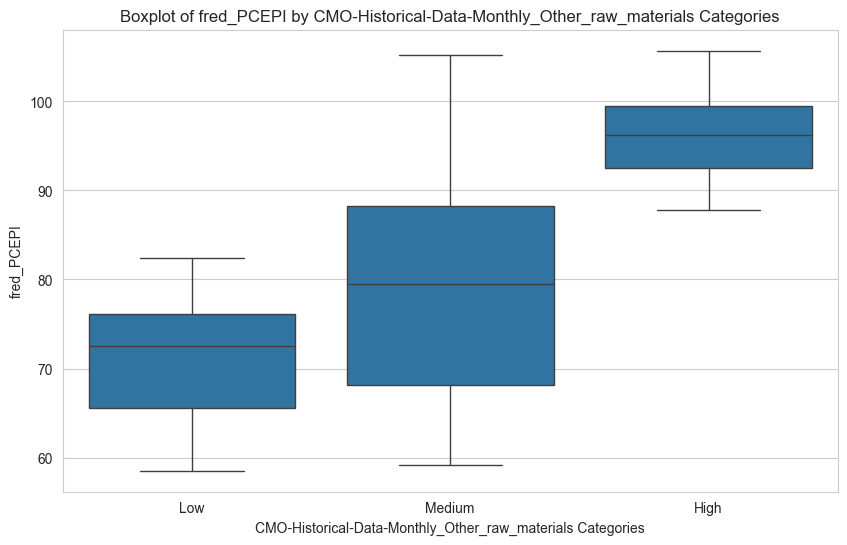

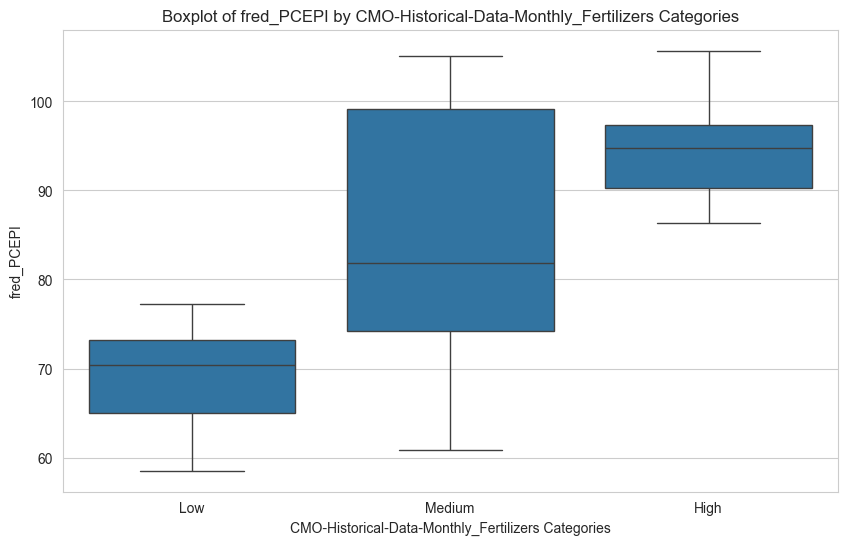

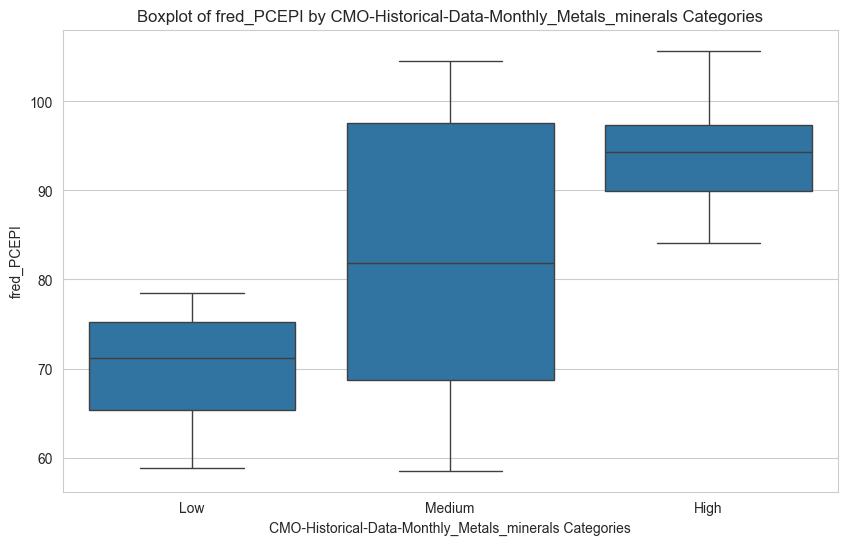

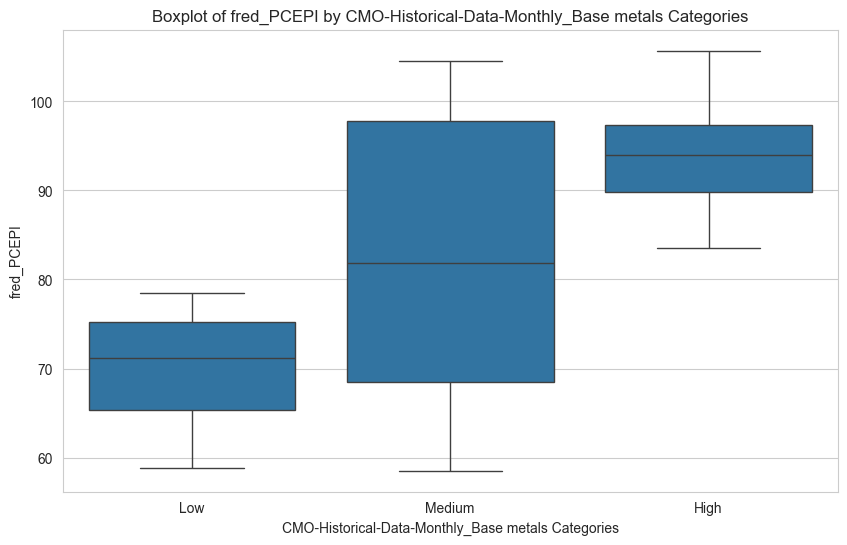

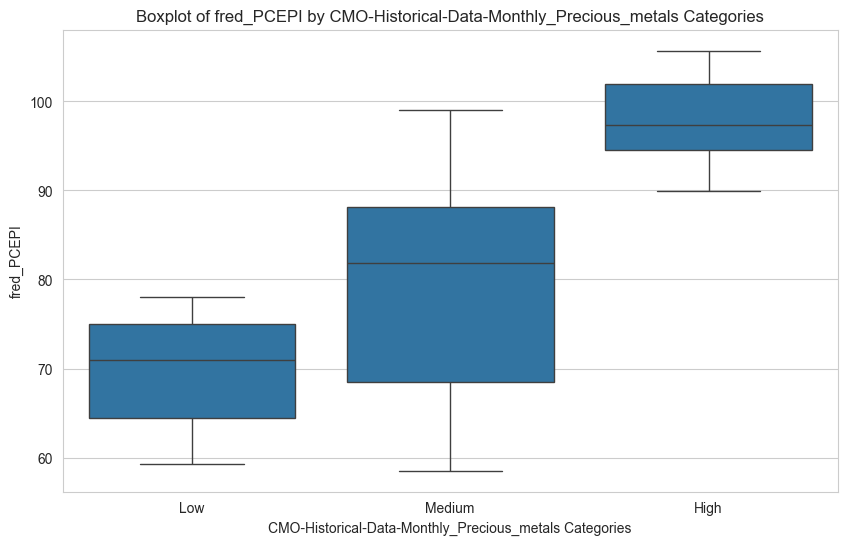

In [11]:
# 2. Boxplots of Significant Variables Against fred_PCEPI
for var in significant_vars:
    try:
        unmodifiedDf['category'] = pd.qcut(unmodifiedDf[var], q=3, labels=['Low', 'Medium', 'High'])
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=unmodifiedDf['category'], y=unmodifiedDf['fred_PCEPI'])
        plt.title(f"Boxplot of fred_PCEPI by {var} Categories")
        plt.xlabel(var + " Categories")
        plt.ylabel("fred_PCEPI")
        plt.show()
    except Exception as e:
        print(f"Skipping {var} due to error: {e}")


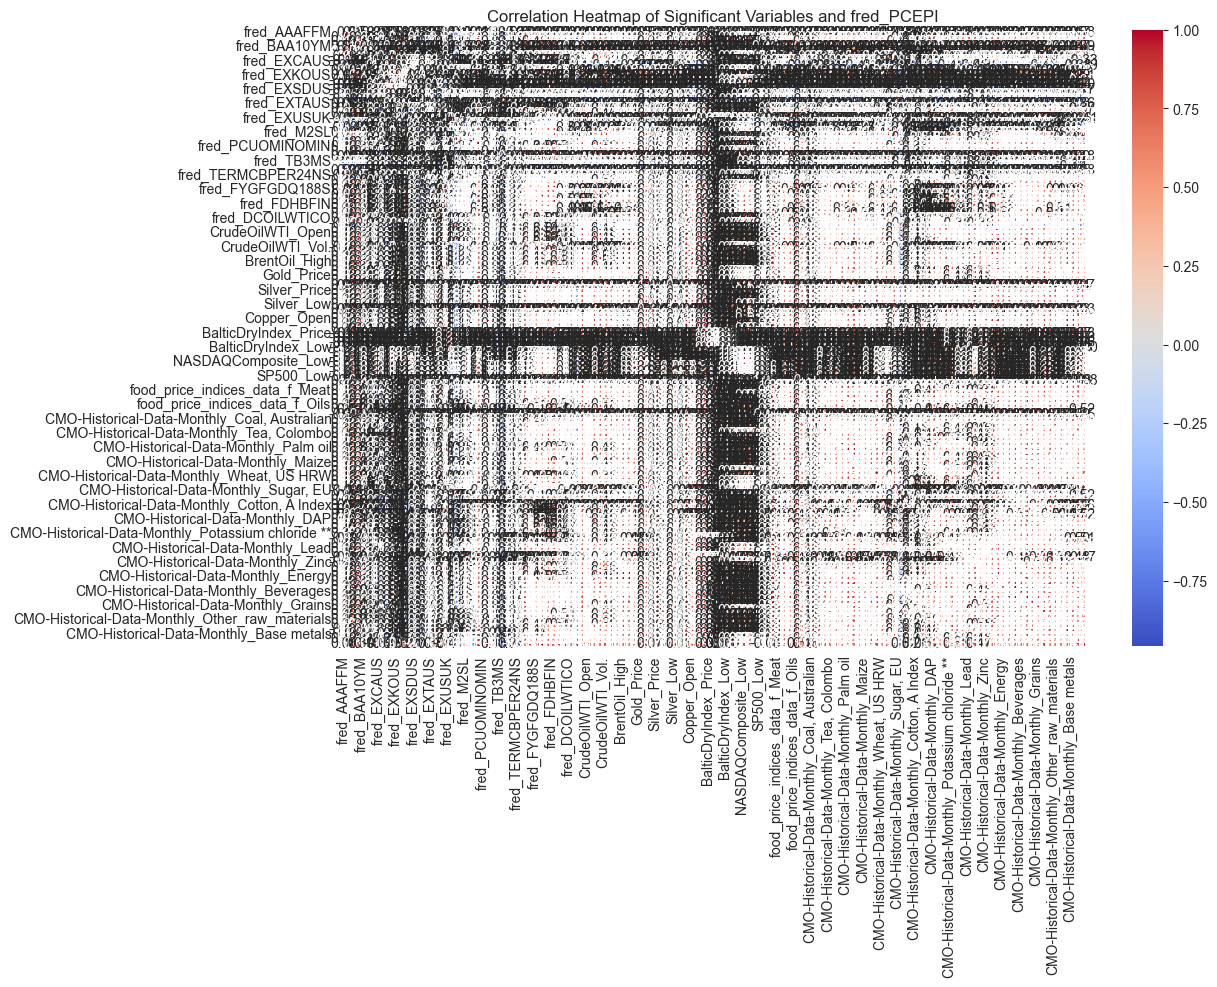

In [12]:
# 3. Heatmap of Correlations Between Significant Variables
plt.figure(figsize=(12, 8))
corr_matrix = unmodifiedDf[significant_vars + ['fred_PCEPI']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Significant Variables and fred_PCEPI")
plt.show()

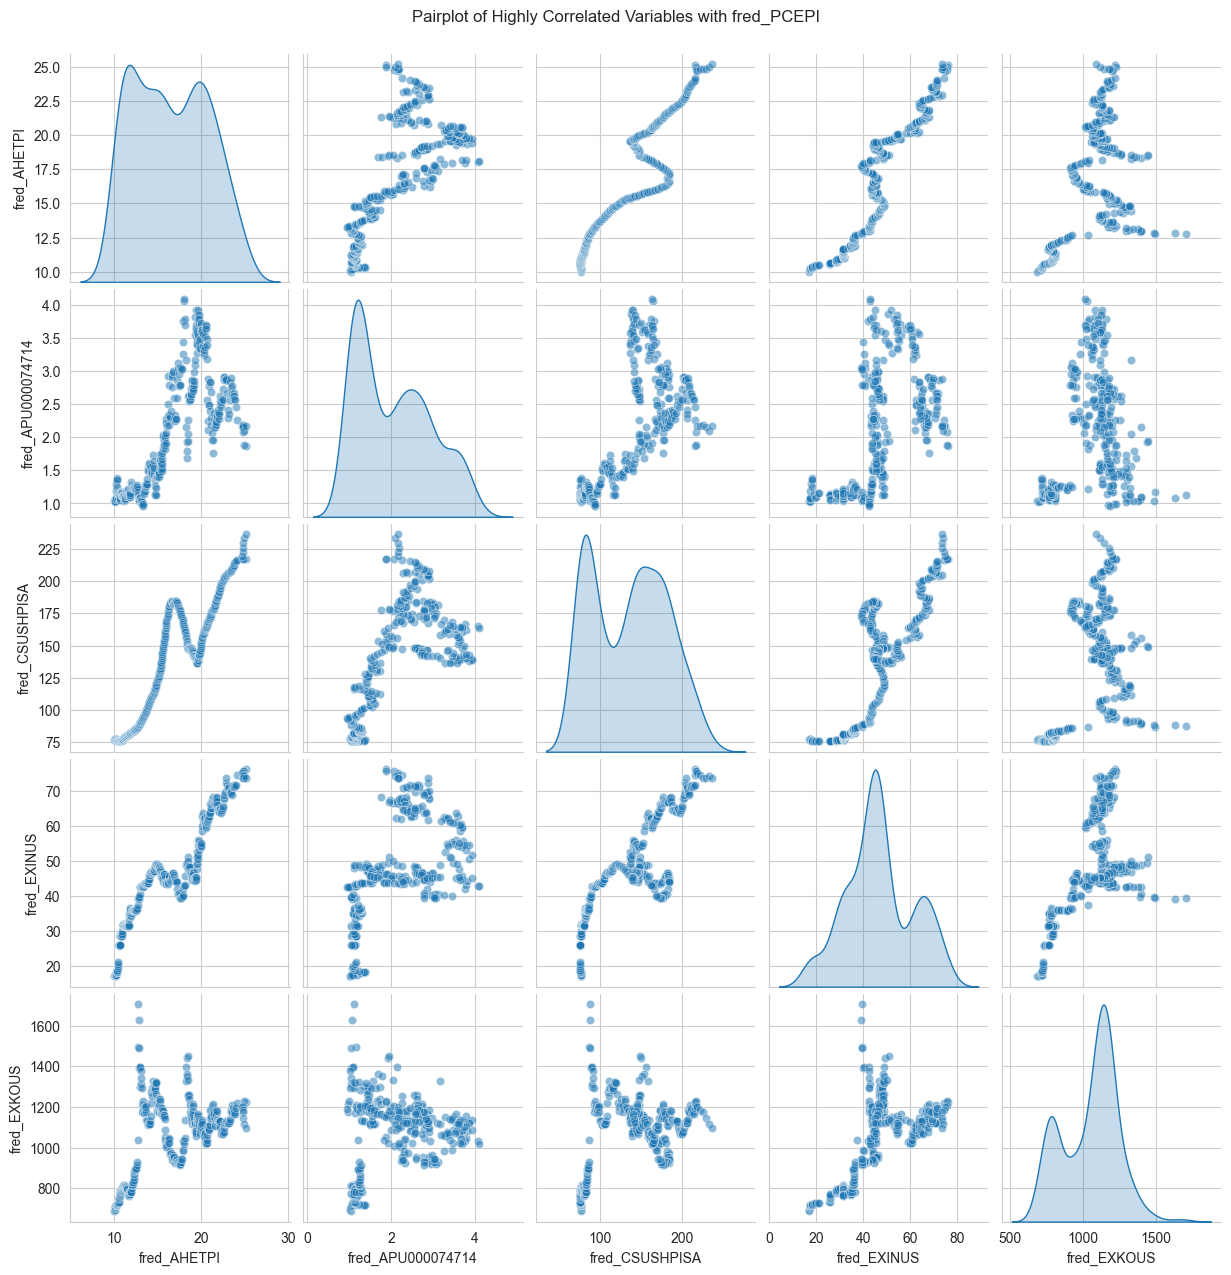

In [13]:
# 4. Pairplot of Highly Correlated Significant Variables
# Ensure there are highly correlated variables
high_corr_vars = corr_matrix[abs(corr_matrix['fred_PCEPI']) > 0.5].index.tolist()

# Limit the number of variables to 5 (for better performance)
high_corr_vars = high_corr_vars[:5] if len(high_corr_vars) > 5 else high_corr_vars

# Ensure we have at least 2 variables (fred_PCEPI + 1 more)
if len(high_corr_vars) > 1:
    # Drop missing values
    pairplot_data = unmodifiedDf[high_corr_vars].dropna()

    # Generate the pairplot
    sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.5})
    plt.suptitle("Pairplot of Highly Correlated Variables with fred_PCEPI", y=1.02)
    plt.show()
else:
    print("Not enough highly correlated variables for pairplot.")



In [16]:
# Extract significant variables from ANOVA results
significant_vars = anova_df[anova_df['Significance'] == 'Significant']['Variable'].tolist()

corr_matrix = unmodifiedDf[significant_vars + ['fred_PCEPI']].corr()

# Define correlation threshold
corr_threshold = 0.5  

# Identify highly correlated significant variables with fred_PCEPI
highly_corr_significant_vars = corr_matrix[abs(corr_matrix['fred_PCEPI']) > corr_threshold].index.tolist()

# Create a table of these variables with correlation values (sorted by absolute correlation)
highly_corr_significant_df = corr_matrix.loc[highly_corr_significant_vars, ['fred_PCEPI']]
highly_corr_significant_df['Absolute Correlation'] = highly_corr_significant_df['fred_PCEPI'].abs()
highly_corr_significant_df = highly_corr_significant_df.sort_values(by='Absolute Correlation', ascending=False)

# Print the table
print("\nHighly Correlated and Significant Variables with fred_PCEPI (Sorted by Absolute Correlation):")
print(highly_corr_significant_df.drop(columns=['Absolute Correlation']))

# Save CSV
highly_corr_significant_df.drop(columns=['Absolute Correlation']).to_csv("highly_correlated_significant_variables.csv", index=True)
print("\nHighly correlated and significant variables saved to 'highly_correlated_significant_variables.csv'")



Highly Correlated and Significant Variables with fred_PCEPI (Sorted by Absolute Correlation):
                                            fred_PCEPI
fred_PCEPI                                    1.000000
fred_AHETPI                                   0.995280
fred_GDP                                      0.993403
fred_PCUOMFGOMFG                              0.978724
fred_A053RC1Q027SBEA                          0.967109
...                                                ...
CMO-Historical-Data-Monthly_Sugar, world      0.521990
food_price_indices_data_f_Sugar               0.521773
CMO-Historical-Data-Monthly_Phosphate rock    0.520915
CMO-Historical-Data-Monthly_Aluminum          0.512390
fred_EXKOUS                                   0.510731

[107 rows x 1 columns]

Highly correlated and significant variables saved to 'highly_correlated_significant_variables.csv'
